# Lending Club Case Study

<b> ================================================================================================================================================================================</b>
 

<p  style='color:Purple'>
    
### Table of Contents - The Analysis Flow <a name="top"> </a>

1. <b>[Data Cleaning](#DataCleaning)</b> </br>
   1.1. [Treating Missing values](#1.1) </br>
   1.2. [Removing irrelevant columns](#1.2)   
   1.3. [Analysing categorical variables - Fixing Incorrect data-types and Removing Outliers](#1.3)
      - 1.3.1 [Understanding term variable](#1.3.1)</br>
      - 1.3.2 [Understanding emp_length variable](#1.3.2)</br>
      - 1.3.3 [Understanding int_rate variable](#1.3.3)</br>
      - 1.3.4 [Understanding issue_d variable](#1.3.4)</br>
      - 1.3.5 [Understanding grade and sub_grade variable](#1.3.5)
      - 1.3.6 [Understanding home_ownership, verification_status , loan_status and purpose variable](#1.3.6)</br>  </br>

   1.4. [Analysing numeric variables - Fixing Incorrect data-types and Removing Outliers](#1.4)
      - 1.4.1 [Removing outliers from annual_inc column](#1.4.1)</br>
      - 1.4.2 [Analyzing loan_amnt,funded_amnt,funded_amnt_inv columns](#1.4.2)</br>
      - 1.4.3 [Analyzing installment columns](#1.4.3)</br></br>

   1.5. [Study loan_status column - Remove unwanted records](#1.5)
   
2. <b>[Univariate Analysis](#2)</b></br>
   2.1. [Loan Split by loan_status](#2.1)</br>
   2.2. [Loan Distribution by loan_amnt](#2.2)</br>
   2.3. [Loan by interest rate](#2.3)</br>
   2.4. [Count of loan by grades](#2.4)</br>
   2.5. [Count of loan by tenure-of-employment](#2.5)</br>
   2.6. [Count of loan by home-ownership](#2.6)</br>
   2.7. [Count of loan by verification_status](#2.7)</br>
   2.8. [Count of loan by purpose](#2.8)</br>
   2.9. [Count of loan by Issue year](#2.9)</br>
   2.10. [Count of loan by Issue month](#2.10)</br>

3. <b>[Segmented Univariate Analysis](#3)</b></br>
   3.1. [Distribution of loan_amnt based on loan_status](#3.1)</br>
   3.2. [Distribution of loan_amnt based on loan term](#3.2)</br>
   3.3. [Distribution of loan_amnt based on home ownership](#3.3)</br>
   3.4. [Distribution of loan_amnt based on purpose of loan](#3.4)</br>
   3.5. [Distribution of loan based on employment tenure](#3.5)</br>
   3.6. [Distribution of loan based on annual_income](#3.6)</br>
   3.7. [Distribution of loan based on interest_rate](#3.7)</br>
   3.8. [Analysis of loan based on DTI](#3.8)</br>

4. <b>[Bivariate Analysis](#4)</b></br>
   4.1. [Find correlation between all continuous variables](#4.1)</br>
   4.2. [Validate correlation between interest rate and grade](#4.2)</br>
   4.3. [Analyze the relation between home_ownership and loan_status](#4.3)</br>
   4.4. [Analyze the total number of loans with public record bankruptcies](#4.4)</br>
   4.5. [Analyze the loan amount with Annual Income by loan status, home_ownership and verification_status](#4.5)</br>
   4.6. [Analyze the annual-income by loan status and grade](#4.6)</br>


5. <b>[Consolidated observations from the Analysis](#5)</b> </br>
6. <b>[Driving Factors behind Loan Default](#6)</b> </br>

</p>

<b> ================================================================================================================================================================================</b>






In [1542]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1543]:
df_loan = pd.read_csv('loan.csv')
df_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1544]:
#Check the shape of the dataframe
df_loan.shape

(39717, 111)

In [1545]:
pd.set_option('display.max_rows', 120)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

### [1] Data Cleaning <a name="1"></a>


[Back To Table of Contents](#top)

### [1.1] Treating Missing values <a name="1.1"></a>

Checking null values in a column

In [1546]:
#Check the number of null values in the columns
df_loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


#### Observation and Inference

<p style='color:Purple'> 
1. A lot of columns have only NULL values. Let's remove them. </br>
2. A number of columns such as `next_pymnt_d`, `mths_since_last_record` and `mths_since_last_delinq` have more than 50% NULL values. We need to drop those columns as well.
</p>


#### Dropping all columns with all NULL values

In [1547]:
df_loan = df_loan.dropna(axis=1, how='all')
df_loan.shape

(39717, 57)

In [1548]:
df_loan = df_loan.drop(['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq'], axis=1)
df_loan.shape

(39717, 54)

#### Dropping all columns with 1 unique value

In [1549]:
df_loan.drop(columns=df_loan.columns[df_loan.nunique()==1], inplace=True)

In [1550]:
df_loan.shape

(39717, 45)

In [1551]:
df_loan.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

### [1.2] Removing irrelevant columns <a name="1.2"></a>

[Back To Table of Contents](#top)

<!-- #### [1.2] Removing irrelevant columns <a name="#1.2"></a>

 -->

In [1552]:
# Removing columns id is just a transaction id and member_id is a borrower id, and it won't be useful for EDA. 

df_loan.drop(['id','member_id'], axis = 1, inplace = True)
df_loan.shape

(39717, 43)

In [1553]:
# Removing column url as it won't be useful for EDA. 

df_loan.drop(['url'], axis = 1, inplace = True)
df_loan.shape

(39717, 42)

In [1554]:
# Removing column desc, title as these attributes would be useful for text analysis, but not for EDA. 

df_loan.drop(['desc','title'], axis = 1, inplace = True)
df_loan.shape

(39717, 40)

In [1555]:
# Removing column zip_code as this is an alphanumeric value, won't be useful for EDA. 

df_loan.drop(['zip_code'], axis = 1, inplace = True)
df_loan.shape

(39717, 39)

In [1556]:
# # Removing column dti as this is very domain specific attribute, and might help in EDA

# df_loan.drop(['dti'], axis = 1, inplace = True)
# df_loan.shape

In [1557]:
# Removing columns inq_last_6mths, revol_bal and revol_util as these are General informational attribute but won't be useful in EDA aroudn defaulters

df_loan.drop(['inq_last_6mths','revol_bal','revol_util','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'], axis = 1, inplace = True)
df_loan.shape

(39717, 28)

In [1558]:
# Removing columns out_prncp and total_pymnt as this is only useful for loan providers, but not for EDA around defaulters.

df_loan.drop(['out_prncp','total_pymnt'], axis = 1, inplace = True)
df_loan.shape

(39717, 26)

In [1559]:
# Removing columns out_prncp_inv and total_pymnt_inv as this is only useful for investors, but not for EDA around defaulters.

df_loan.drop(['out_prncp_inv','total_pymnt_inv'], axis = 1, inplace = True)
df_loan.shape

(39717, 24)

#### Re-checking count of null values in all columns

In [1560]:
df_loan.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

#### Checking values in `emp_title` column

In [1561]:
df_loan.emp_title.value_counts()

US Army                        134
Bank of America                109
IBM                             66
AT&T                            59
Kaiser Permanente               56
                              ... 
JH Reid General Contractors      1
Huntleigh USA                    1
Childrens's Medical Center       1
Fisher Asset Management LLC      1
CEC ENTERTAINMENT INC            1
Name: emp_title, Length: 28820, dtype: int64

<p style='color:Purple'> 
<b>Observation and Inference - Considering no values would be populated in the blank `emp_title` we will remove this column as well.</b>
</p>



In [1562]:
df_loan.drop(['emp_title'], axis = 1, inplace = True)
df_loan.shape

(39717, 23)

#### Checking values in `emp_length` column

In [1563]:
df_loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [1564]:
df_loan.emp_length.mode()[0]

'10+ years'


<p style='color:Purple'> 
<b>Observation and Inference - We will populate mode value of `emp_length` in the rows with blank values.</b>
</p>


In [1565]:
df_loan.emp_length.isnull().sum()

1075

In [1566]:
df_loan.emp_length.fillna(df_loan.emp_length.mode()[0],inplace=True)

In [1567]:
df_loan.emp_length.isnull().sum()

0

#### Checking values in `pub_rec_bankruptcies` column

In [1568]:
df_loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


<p style='color:Purple'> 
<b>Observation and Inference - We will populate mode value of `pub_rec_bankruptcies` in the rows with blank values.</b>
</p>


In [1569]:
df_loan.pub_rec_bankruptcies.fillna(df_loan.pub_rec_bankruptcies.mode()[0],inplace=True)

In [1570]:
df_loan.pub_rec_bankruptcies.isnull().sum()

0

In [1571]:
df_loan.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
open_acc                0
pub_rec                 0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64


<p style='color:Purple'> 
<b>Observation - All the missing values in the dataset has been handled. </b>
</p>


In [1572]:
df_loan.shape

(39717, 23)

### [1.3] Handling incorrect data-types and Removing Outliers <a name="1.3"></a>
[Back To Table of Contents](#top)

As a part of this exercise we will make sure that the data-types are in correct format and sanitise the columns for EDA.


In [1573]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            39717 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

In [1574]:
df_loan.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object


<p style='color:Purple'> 
    <b> Observations and Inference </b></br></br>
    Data types of all the attributes seems correct. However, we need to derive and extract specific info from attributes for better EDA
</br>
</p>




#### [1.3.1] Understanding `term` variable <a name="1.3.1"></a>

<p style='color:Purple'> 
We need to check the different unique values in `term` attribute. If there are more than 5 unique values,we might like to extract number of months Eg: Extract "36" from "36 months" </p>


<Axes: xlabel='term'>

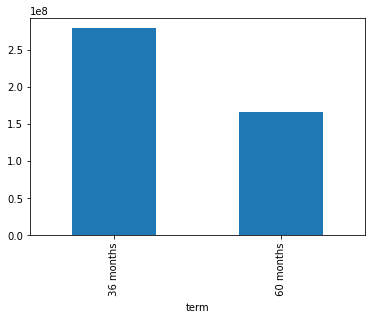

In [1575]:
##Plot a bar plot of term vs loan_amnt 
df_loan.groupby(['term'])['loan_amnt'].sum().plot.bar()

<p style='color:Purple'>
As we have only two values in `term` attribute, we wont extract months. 
</p>

#### [1.3.2] Checking `int_rate` variable <a name="1.3.2"></a> 

<p style='color:Purple'>
We need to remove the "%" symbol from the `int_rate` attribute. Eg: Extract "11.5" from "11.5%"
</p>

In [1576]:
df_loan['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [1577]:
df_loan['int_rate'] = df_loan['int_rate'].str.replace('%','')
df_loan['int_rate'] = df_loan['int_rate'].astype(str).astype(float)

In [1578]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  float64
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            39717 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

<p style='color:Purple'>
We have removed the '%' symbol from the `int_rate` column and converted the column to float </br></br>
Let's plot a quick histogram and check the distribution.
</p>


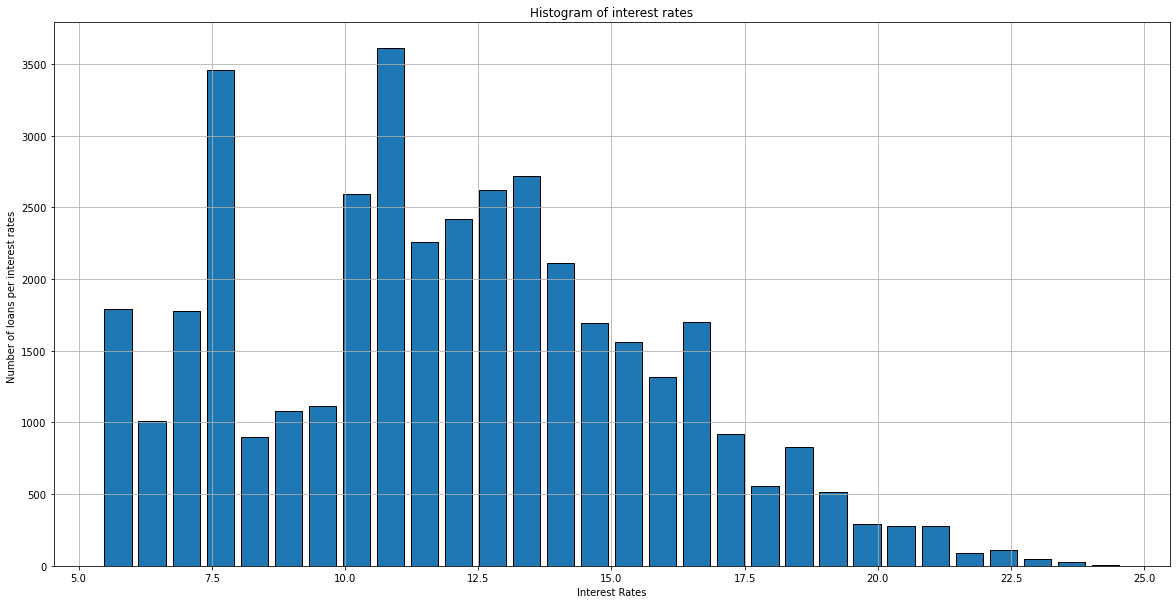

In [1579]:
plt.figure(figsize = (20,10))
df_loan['int_rate'].hist(bins=30,edgecolor='black',rwidth=0.8)
plt.title('Histogram of interest rates')
plt.xlabel('Interest Rates')
plt.ylabel('Number of loans per interest rates ')
plt.show()

<p style='color:Purple'>
<b> Observation </b> </br> </br>
1. Most of the interest rates lie between 7.5 % to 15 %. However, there are so less loans with interest rates more than 22.5%. </br>
2. Let's plot a box-plot to understand the interest rates better.
</p>

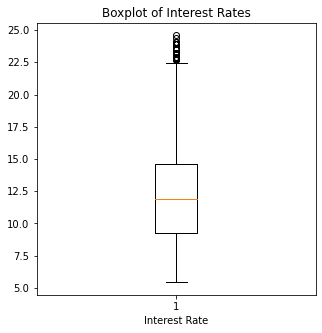

In [1580]:
plt.figure(figsize = (5,5))
plt.boxplot(df_loan['int_rate'])
plt.title('Boxplot of Interest Rates')
plt.xlabel('Interest Rate')
plt.show();

<p style='color:Purple'>
<b> Observation </b> - The max value of interest rates is around 22.5, hence we will count the number of records with interest rates higher than 22.5% anf then remove those records.


In [1581]:
len(df_loan[df_loan['int_rate']>22])

187

In [1582]:
df_loan.shape

(39717, 23)

In [1583]:
df_loan = df_loan.loc[~(df_loan['int_rate']>=22)]

<p style='color:Purple'>
<b> Inference </b> - We have eliminated the outliers by dropping the interest rates with more than 22.5 %. Let's re-plot the box-plot and verify.


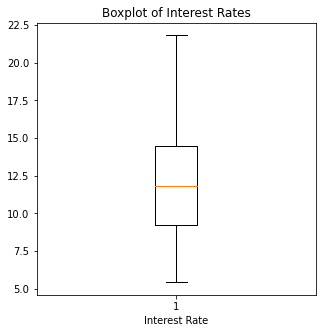

In [1584]:
plt.figure(figsize = (5,5))
plt.boxplot(df_loan['int_rate'])
plt.title('Boxplot of Interest Rates')
plt.xlabel('Interest Rate')
plt.show();

<p style='color:Purple'>
<b> Inference </b> - Outliers removed from `Interest Rate` column. 


#### [1.3.3] Checking `emp_length` variable <a name="1.3.3"></a> 

<p style='color:Purple'>
We need to check the number of unique values in `emp_length`
</p>

<Axes: xlabel='emp_length'>

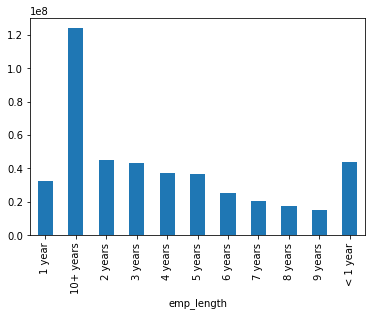

In [1585]:
##Plot a bar plot of term vs loan_amnt 
df_loan.groupby(['emp_length'])['loan_amnt'].sum().plot.bar()


<p style='color:Purple'>
`emp_length` column has only 11 unique values and we can use these attributes in the original format. Hence, no change required.
</p>

#### [1.3.4] Checking `issue_d` variable <a name="1.3.4"></a> 

<p style='color:Purple'>
We need to check the values in `issue_d` variable
</p>



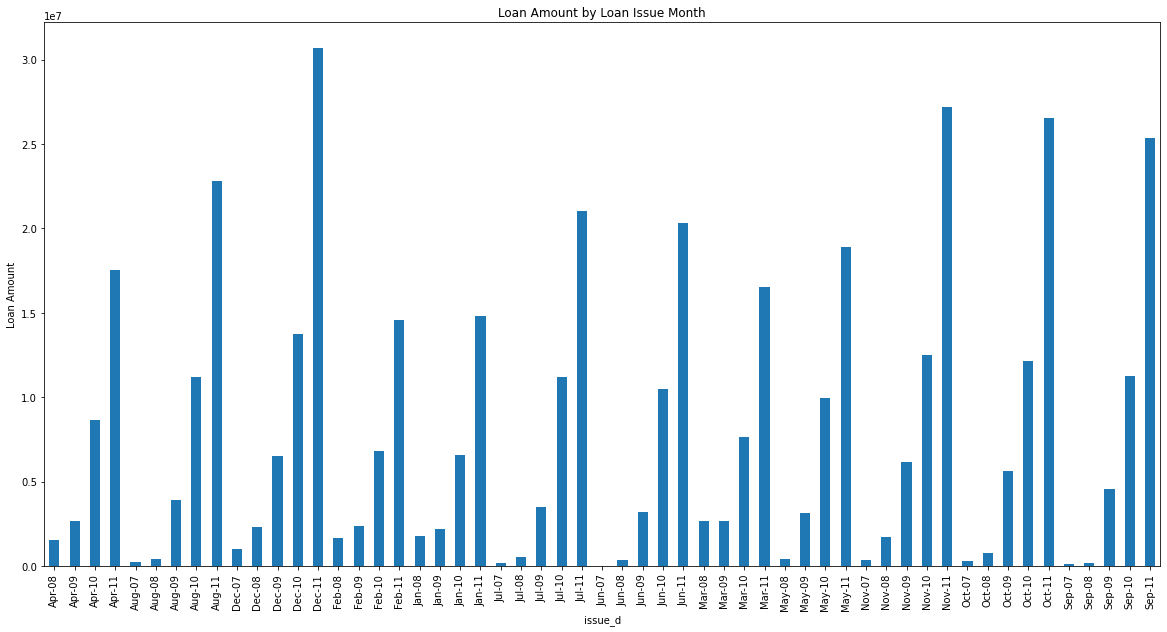

In [1586]:
plt.figure(figsize = (20,10))
plt.title('Loan Amount by Loan Issue Month')
plt.xlabel('Loan Issue Month')
plt.ylabel('Loan Amount')

df_loan.groupby(['issue_d'])['loan_amnt'].sum().plot.bar()
plt.show();

<p style='color:Purple'>
The x-axis above is not sorted. To fix this, we will convert the data type of `issue_d` column and convert it to date
</p>


In [1587]:
df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'].str.upper(), format='%b-%y', yearfirst=False, errors = 'coerce')
df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d']).dt.date

In [1588]:
df_loan['issue_year'] = pd.DatetimeIndex(df_loan['issue_d']).year
df_loan['issue_month'] = pd.DatetimeIndex(df_loan['issue_d']).month

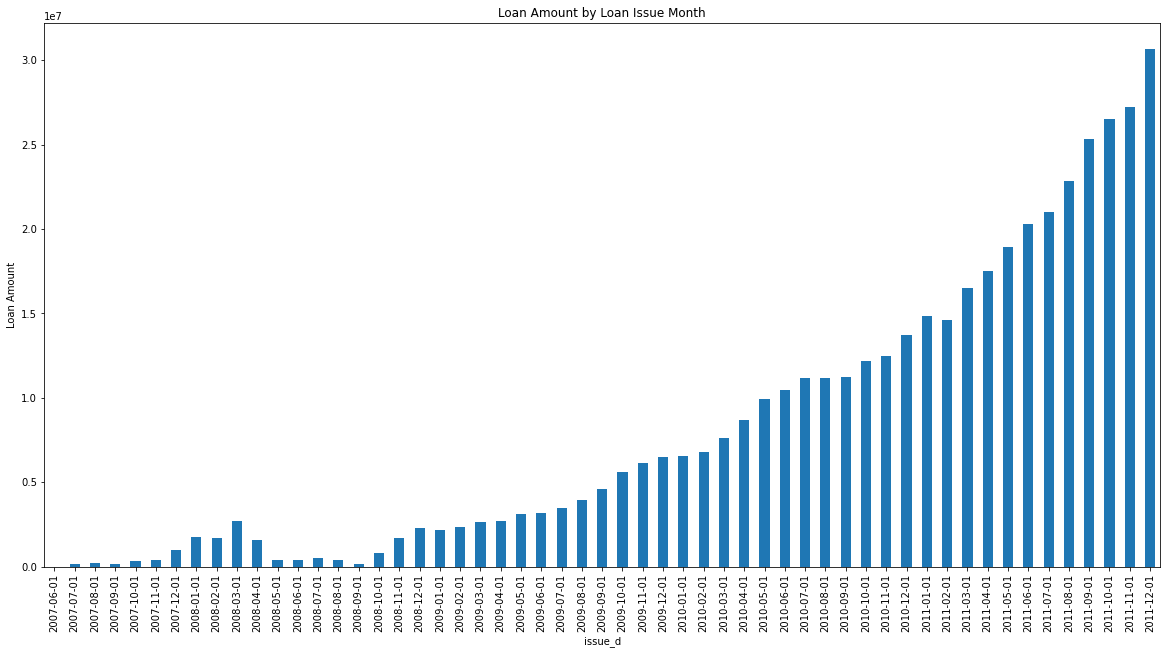

In [1589]:
plt.figure(figsize = (20,10))
plt.title('Loan Amount by Loan Issue Month')
plt.xlabel('Loan Issue Month')
plt.ylabel('Loan Amount')

df_loan.groupby(['issue_d'])['loan_amnt'].sum().plot.bar()
plt.show();

<p style='color:Purple'>
The column `issue_d` is sorted and the data-type is converted to date.
</p>


#### [1.3.5] Understanding `grade` and `sub_grade` variable <a name="1.3.5"></a> 

<p style='color:Purple'>
We need to check the values of `grade` and `sub_grade` variable
</p>


In [1590]:
df_loan['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

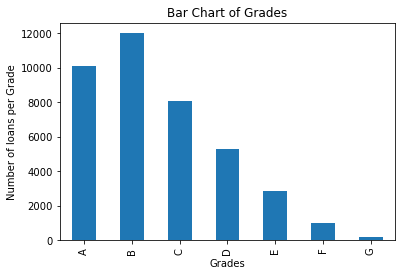

In [1591]:
##Plot a bar plot of term vs loan_amnt 
df_loan.groupby(['grade'])['loan_amnt'].count().plot.bar()
plt.title('Bar Chart of Grades')
plt.xlabel('Grades')
plt.ylabel('Number of loans per Grade')
plt.show()

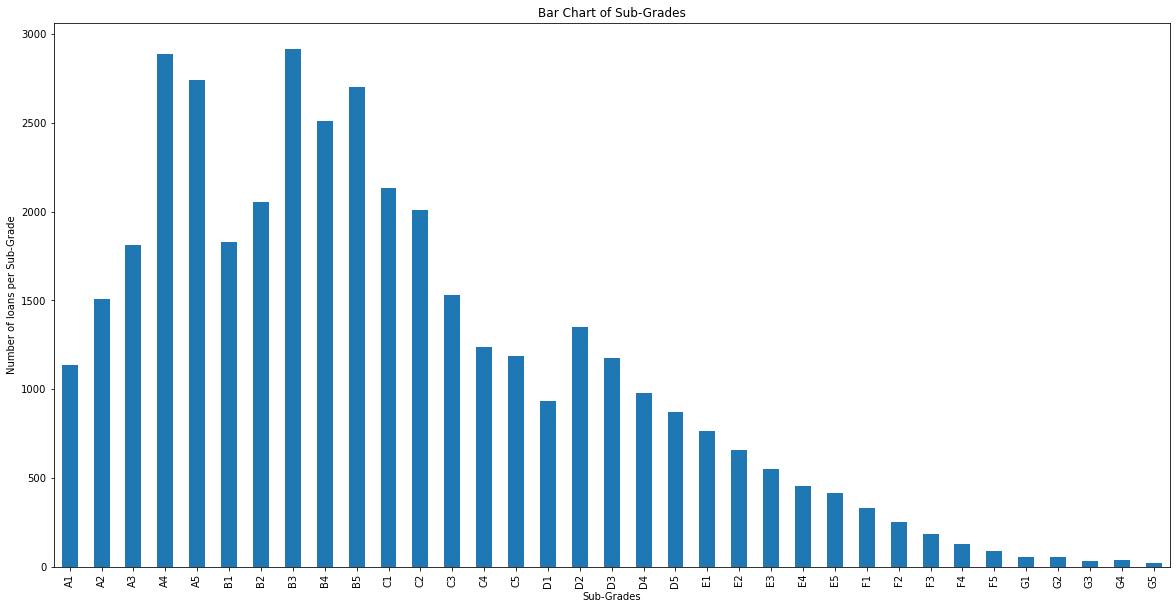

In [1592]:
##Plot a bar plot of term vs loan_amnt 
plt.figure(figsize = (20,10))
df_loan.groupby(['sub_grade'])['loan_amnt'].count().plot.bar()
plt.title('Bar Chart of Sub-Grades')
plt.xlabel('Sub-Grades')
plt.ylabel('Number of loans per Sub-Grade')
plt.show();

<p style='color:Purple'>
<b> Observation </b>- From the bar-graph of sub-grades, it seems very similar to the histogram of interest rates. 
</br>    
To confirm on this observation, we will plot both the charts together and find correlation between them.
</p>


In [1593]:
df_subgrade = df_loan.groupby(['sub_grade'])['loan_amnt'].count().reset_index()
df_subgrade

,sub_grade,loan_amnt
0,A1,1139
1,A2,1508
2,A3,1810
3,A4,2886
4,A5,2742
5,B1,1830
6,B2,2057
7,B3,2917
8,B4,2512
9,B5,2704


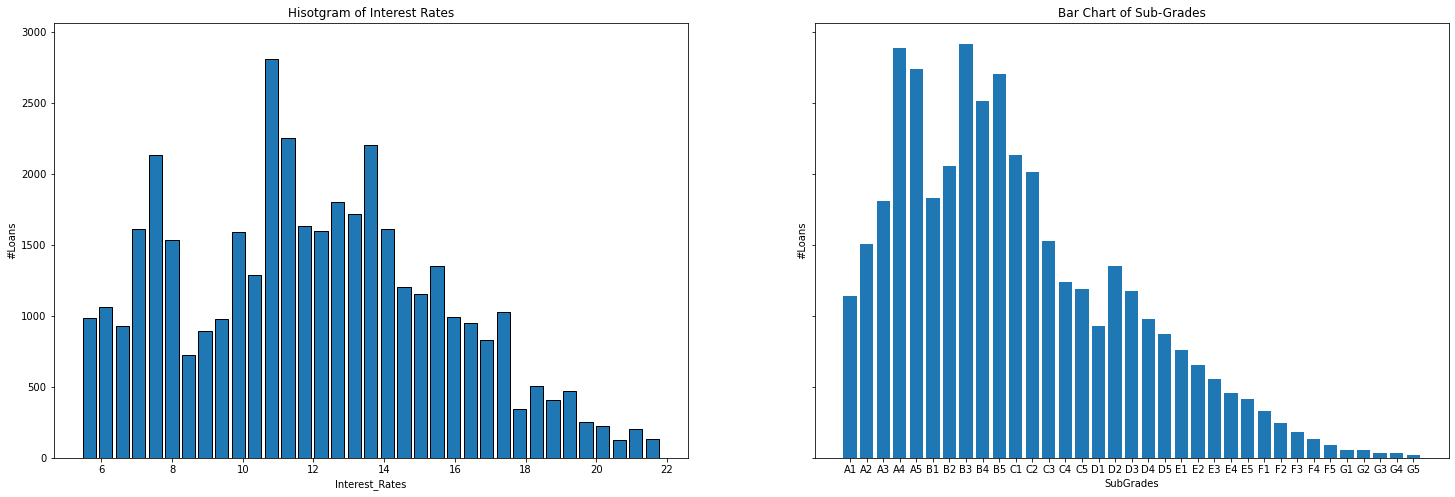

In [1594]:
fix,ax = plt.subplots(ncols=2,nrows=1,sharey=True,figsize=(25, 8), squeeze=False)

IntRate = ax[0][0].hist(df_loan['int_rate'],bins=35,edgecolor='black',rwidth=0.8)
ax[0][0].set(xlabel='Interest_Rates', ylabel='#Loans')
ax[0][0].set_title('Hisotgram of Interest Rates')

SubGrade = ax[0][1].bar(df_subgrade['sub_grade'],df_subgrade['loan_amnt'])
ax[0][1].set(xlabel='SubGrades', ylabel='#Loans')
ax[0][1].set_title('Bar Chart of Sub-Grades')

plt.show()

<p style='color:Purple'>
<b> Observation and Inference </b>- From the graphs above, seems like these two columns are related to each other.  
</br> </br>    
<b> This also means, the higher the sub-grade, higher the interest-rate and higher the risk. </b> 
</p>


#### [1.3.6] Understanding `home_ownership`, `verification_status` , `loan_status` and `purpose` variable <a name="1.3.6"></a> 

<p style='color:Purple'>
We will plot al these 4 variables together 
</p>

[Back To Table of Contents](#top)

In [1595]:
df_home = df_loan.groupby(['home_ownership'])['loan_amnt'].count().reset_index()
df_verification = df_loan.groupby(['verification_status'])['loan_amnt'].count().reset_index()
df_loan_status = df_loan.groupby(['loan_status'])['loan_amnt'].count().reset_index()
df_purpose = df_loan.groupby(['purpose'])['loan_amnt'].count().reset_index()


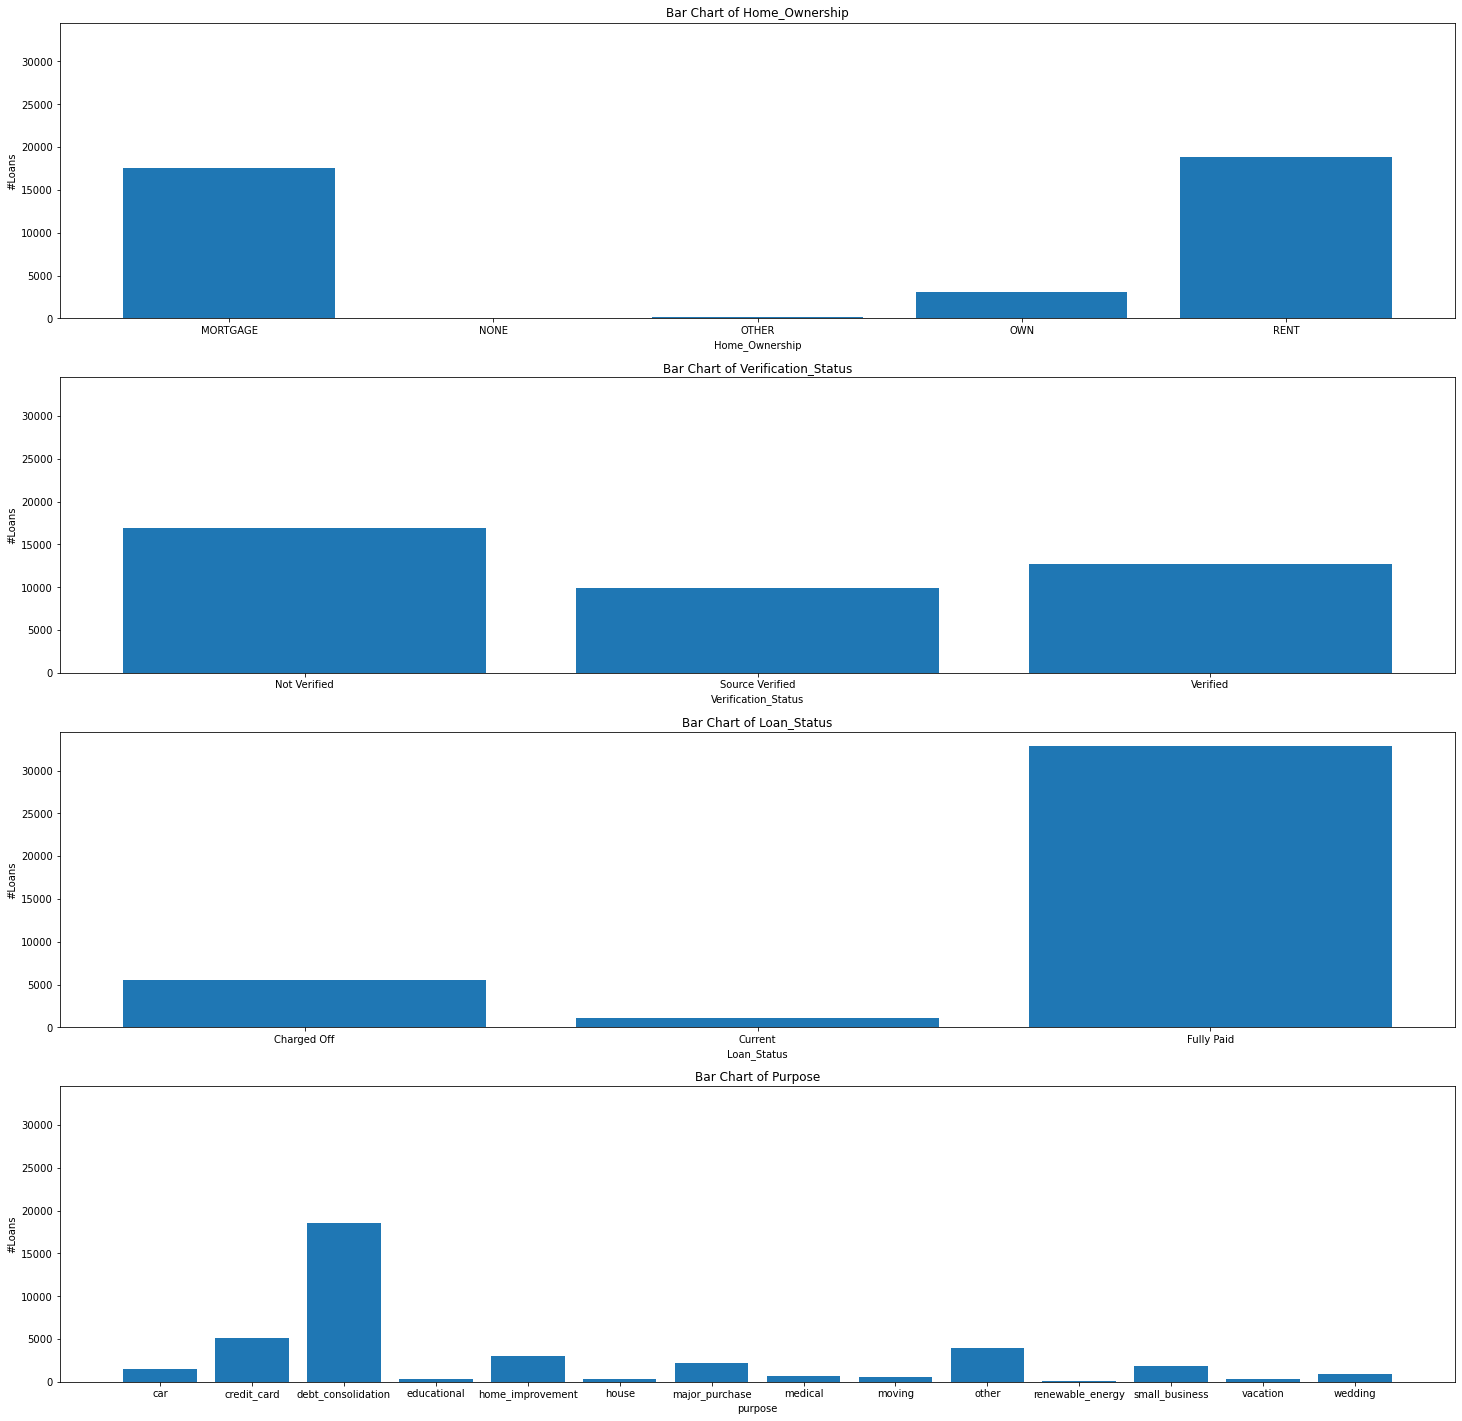

In [1596]:

fix2,ax2 = plt.subplots(ncols=1,nrows=4,sharey=True,figsize=(25, 25), squeeze=False)

Home_Ownership = ax2[0][0].bar(df_home['home_ownership'],df_home['loan_amnt'])
ax2[0][0].set(xlabel='Home_Ownership', ylabel='#Loans')
ax2[0][0].set_title('Bar Chart of Home_Ownership')

Verification_Status = ax2[1][0].bar(df_verification['verification_status'],df_verification['loan_amnt'])
ax2[1][0].set(xlabel='Verification_Status', ylabel='#Loans')
ax2[1][0].set_title('Bar Chart of Verification_Status')

Loan_Status = ax2[2][0].bar(df_loan_status['loan_status'],df_loan_status['loan_amnt'])
ax2[2][0].set(xlabel='Loan_Status', ylabel='#Loans')
ax2[2][0].set_title('Bar Chart of Loan_Status')

Purpose = ax2[3][0].bar(df_purpose['purpose'],df_purpose['loan_amnt'])
ax2[3][0].set(xlabel='purpose', ylabel='#Loans')
ax2[3][0].set_title('Bar Chart of Purpose')

plt.show()

<p style='color:Purple'>
<b> Observation </b> All the four columns have valid values, no transformation required here.
</p>


###  [1.4] Analysing numeric variables - Incorrect data-types and Removing Outliers <a name="1.4"></a>

[Back To Table of Contents](#top)

In [1597]:
# Defining a list of numerical columns
numerical_columns = ['loan_amnt','funded_amnt','funded_amnt_inv', 'installment','annual_inc', 'delinq_2yrs',
                  'open_acc','pub_rec', 'total_acc', 'pub_rec_bankruptcies','dti']


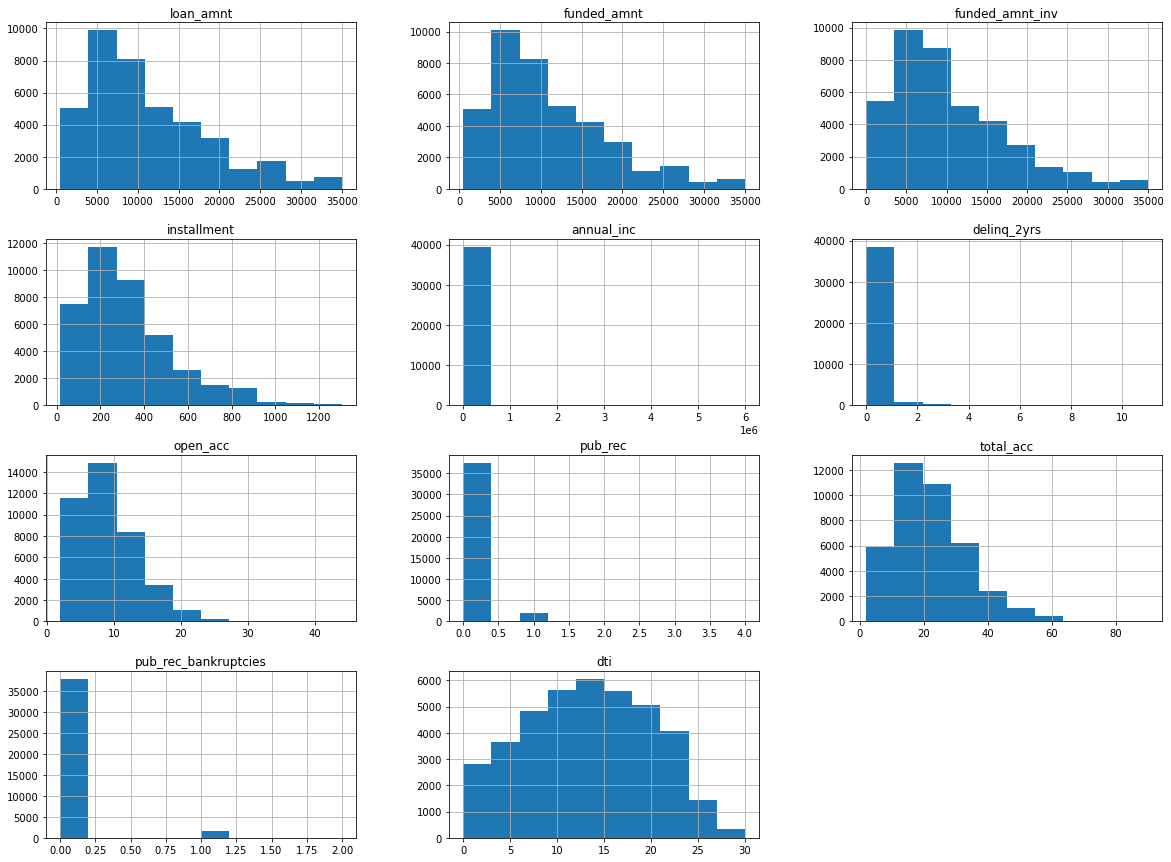

In [1598]:
df_loan[numerical_columns].hist(bins = 10, figsize = (20,15))
plt.show();

<p style='color:Purple'>
<b> Observation </b> This is great to see the distribution of the variables, but let's also plot a boxplot to understand this better.  
</p>


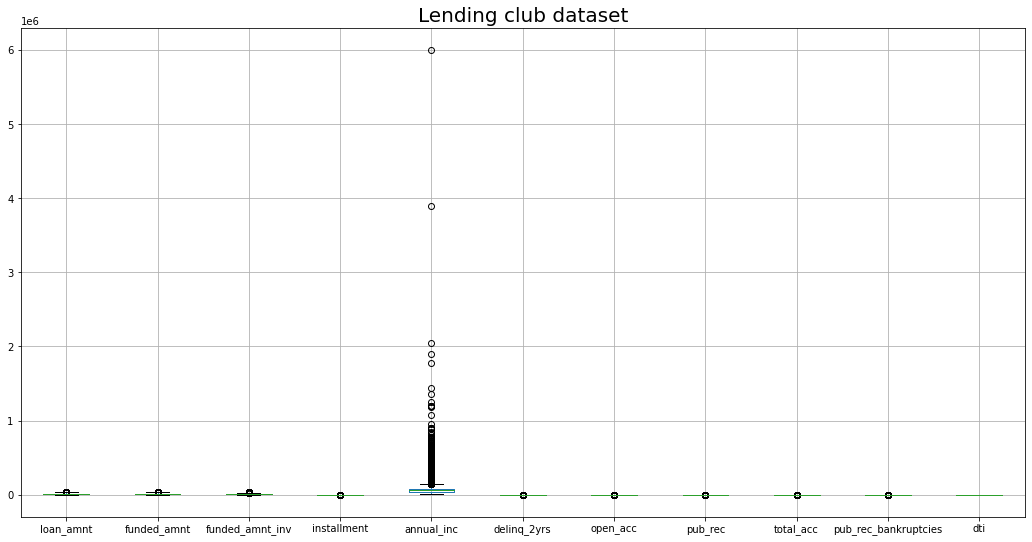

In [1599]:

plt.figure(figsize=(18,9))
df_loan[numerical_columns].boxplot()
plt.title("Lending club dataset", fontsize=20)
# plt.ylim(0,100000)
plt.show()


<p style='color:Purple'>
<b> Observation </b> </br> </br>
1. We see <i>annual_inc</i> attribute has a number of outliers. We will work towards removing it. </br>
2. Other attributes aso have outliers, but we will have to limit y axis to understand this better. 
</p>


####  [1.4.1] Removing outliers from `annual_inc` column <a name="1.4.1"></a>

[Back To Table of Contents](#top)

In [1600]:
df_loan[['annual_inc','loan_amnt','funded_amnt','funded_amnt_inv']].describe()

,annual_inc,loan_amnt,funded_amnt,funded_amnt_inv
count,3.953000e+04,39530.000000,39530.000000,39530.000000
mean,6.881814e+04,11164.949406,10893.208955,10342.106718
std,6.370504e+04,7405.329662,7132.958357,7071.516163
min,4.000000e+03,500.000000,500.000000,0.000000
25%,4.020000e+04,5500.000000,5356.250000,5000.000000
50%,5.900000e+04,10000.000000,9600.000000,8925.000000
75%,8.200000e+04,15000.000000,15000.000000,14300.000000
max,6.000000e+06,35000.000000,35000.000000,35000.000000


<p style='color:Purple'>
<b> Observations </b> </br>
We will format the output and remove the sceintific notation for better understanding.
</p>


In [1601]:
df_loan['annual_inc'].describe().apply(lambda x: format(x, 'f'))

count      39530.000000
mean       68818.143657
std        63705.037828
min         4000.000000
25%        40200.000000
50%        59000.000000
75%        82000.000000
max      6000000.000000
Name: annual_inc, dtype: object

<p style='color:Purple'> 
<b> Inference </b> </br> 
This is great, but lets also identify the other percentile values
</p> 


In [1602]:

df_loan.annual_inc.quantile([0, 0.01,0.05,0.1,0.25, 0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99,1])

0.00       4000.000
0.01      14400.000
0.05      24000.000
0.10      30000.000
0.25      40200.000
0.50      59000.000
0.75      82000.000
0.90     115158.744
0.95     140302.200
0.97     165000.000
0.98     186026.460
0.99     233711.160
1.00    6000000.000
Name: annual_inc, dtype: float64

In [1603]:
df_loan.shape

(39530, 25)

<p style='color:Purple'> 
<b> Inference </b> </br> 
Based on above numbers, it seems like we can remove all the loans above 95th percentile of the annual income, but lets analyze this bucket separately before we exclude them.
</p> 


In [1604]:
df_annual_income_95th = df_loan[df_loan['annual_inc']>=df_loan["annual_inc"].quantile(0.95)]
df_annual_income_95th.shape

(1977, 25)

<Axes: xlabel='loan_status'>

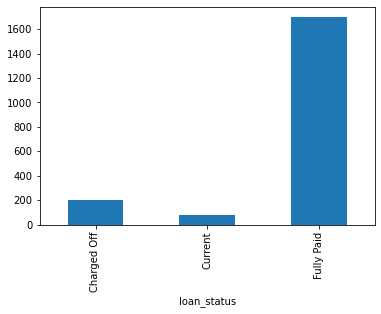

In [1605]:
df_annual_income_95th.groupby('loan_status')['loan_amnt'].count().plot.bar()

<p style='color:Purple'> 
<b> Observation </b> </br> 
We see most of the loan was "Fully Paid" which is as expected, hence we will remove only the 99th percetile of the info from the master dataset.
</p> 


In [1606]:
df_loan_clean = df_loan[df_loan['annual_inc'] <= df_loan["annual_inc"].quantile(0.99)]
df_loan_clean.shape

(39134, 25)

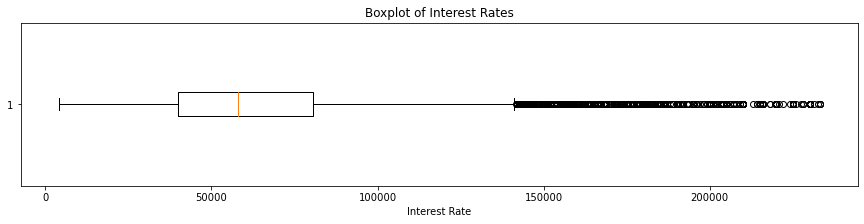

In [1607]:
# Replotting box plot only for `annual_inc`

plt.figure(figsize = (15,3))
plt.boxplot(df_loan_clean['annual_inc'],vert=False)
plt.title('Boxplot of Interest Rates')
plt.xlabel('Interest Rate')
plt.show();



<p style='color:Purple'> 
<b> Observation </b> </br> 
From the above box-plot we infer that, there are stil some outliers but based on the business understanding we decided not to delete all outliers. </br>
As a result, we only opted to remove the extreme outliers for the column annual_inc.
</p> 


####  [1.4.2] Analyzing 'loan_amnt','funded_amnt','funded_amnt_inv' columns <a name="1.4.2"></a>

[Back To Table of Contents](#top)

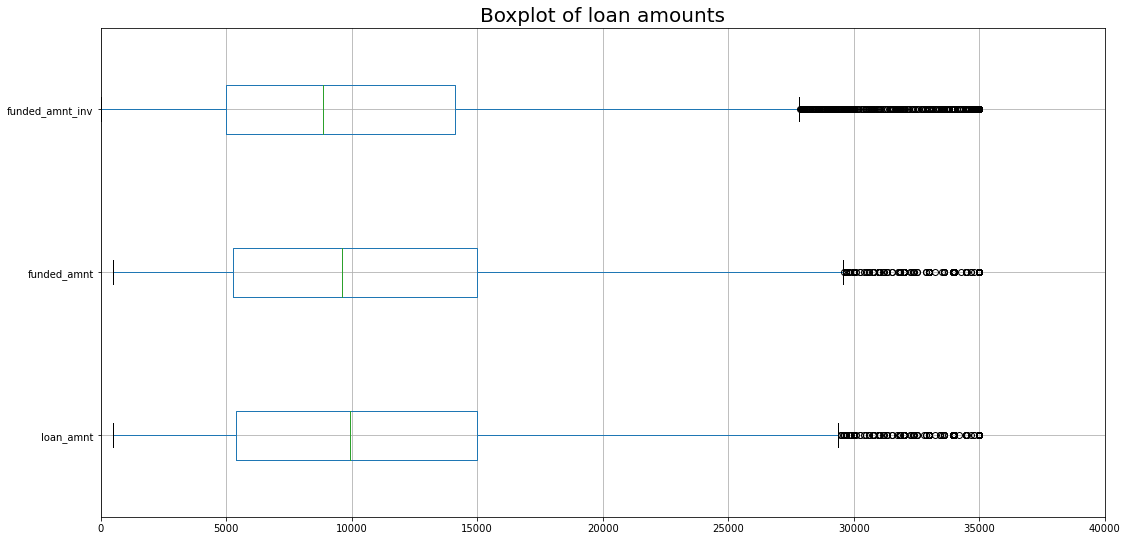

In [1608]:
plt.figure(figsize=(18,9))
df_loan_clean[['loan_amnt','funded_amnt','funded_amnt_inv']].boxplot(vert=False)
plt.title("Boxplot of loan amounts", fontsize=20)
plt.xlim(0,40000)
plt.show()


<p style='color:Purple'> 
<b> Next Step </b> </br> 
Let's check the description of these 3 columns
</p> 


In [1609]:
df_loan_clean[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,39134.000000,39134.000000,39134.000000
mean,11080.994787,10812.698038,10266.287281
std,7326.201196,7055.346023,6993.919264
min,500.000000,500.000000,0.000000
25%,5400.000000,5275.000000,5000.000000
50%,9925.000000,9600.000000,8850.000000
75%,15000.000000,15000.000000,14125.000000
max,35000.000000,35000.000000,35000.000000


<p style='color:Purple'> 
<b> Observation </b> </br> 
1. We seem to have outliers, but this is in alignment with the outliers we had in annual income column. </br>
2. It might be possible, that high income indivduals sometimes take loan to fund their side/office-projects. </br> 
3. Hence, we won't delete outliers from these three attributes as well. 
</p> 


####  [1.4.3] Analyzing 'installment' columns <a name="1.4.3"></a>

[Back To Table of Contents](#top)

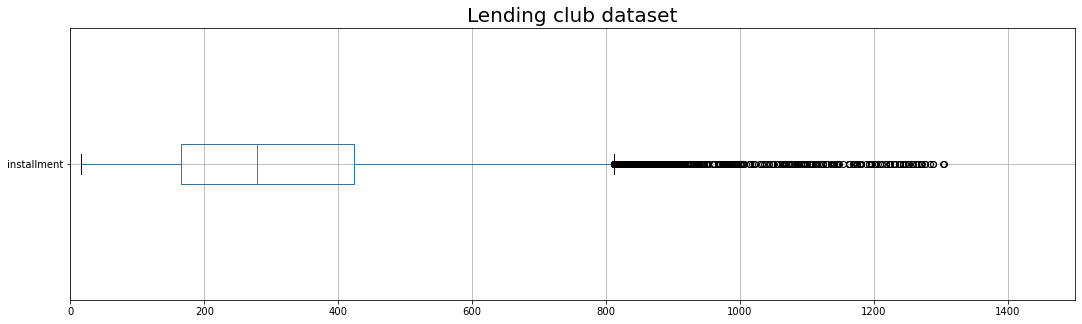

In [1610]:
plt.figure(figsize=(18,5))
df_loan_clean[['installment']].boxplot(vert=False)
plt.title("Lending club dataset", fontsize=20)
plt.xlim(0,1500)
plt.show()


<p style='color:Purple'> 
<b> Observation </b> </br> 
We seem to have some outliers, but let's study this in detail. 
</p> 


In [1611]:

df_loan_clean.installment.quantile([0, 0.01,0.05,0.1,0.25, 0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99,1])

0.00      15.6900
0.01      37.5433
0.05      70.8700
0.10      99.1950
0.25     165.8200
0.50     278.1500
0.75     424.0600
0.90     612.5660
0.95     741.0060
0.97     818.4901
0.98     861.6300
0.99     913.6102
1.00    1305.1900
Name: installment, dtype: float64

<p style='color:Purple'> 
<b> Next Step </b> </br> 
Let's study the data for installment values beyond 99th percentile
</p> 


In [1612]:
df_loan_clean[df_loan_clean['installment']>df_loan_clean.installment.quantile(0.99)]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,issue_year,issue_month
31,31825,31825,31825.00000,36 months,7.90,995.82,A,A4,5 years,MORTGAGE,...,NJ,14.03,0,Nov-81,12,0,26,0.0,2011,12
128,35000,35000,35000.00000,36 months,8.90,1111.37,A,A5,6 years,MORTGAGE,...,CA,22.71,0,Aug-00,8,0,32,0.0,2011,12
185,35000,35000,35000.00000,36 months,10.65,1140.07,B,B2,2 years,MORTGAGE,...,TX,3.17,1,Dec-02,16,0,22,0.0,2011,12
276,35000,35000,35000.00000,36 months,8.90,1111.37,A,A5,5 years,RENT,...,IL,17.73,0,Jul-01,7,0,13,0.0,2011,12
309,28000,28000,28000.00000,36 months,12.69,939.26,B,B5,5 years,RENT,...,WI,12.35,0,Oct-00,7,0,15,0.0,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32513,25000,25000,24602.23730,36 months,19.04,916.95,F,F3,3 years,RENT,...,CA,16.03,0,Aug-94,2,0,3,0.0,2010,2
33263,25000,25000,24950.00000,36 months,18.78,913.63,F,F3,10+ years,MORTGAGE,...,VA,18.18,0,Nov-95,11,0,25,0.0,2009,12
34319,25000,25000,24781.46501,36 months,19.13,918.02,F,F4,9 years,MORTGAGE,...,AZ,18.54,1,Jun-96,9,0,38,0.0,2009,11
36040,25000,25000,14900.00000,36 months,18.84,914.42,G,G1,5 years,MORTGAGE,...,TX,19.30,0,Nov-90,13,0,48,0.0,2009,7


<p style='color:Purple'> 
<b> Observation </b> </br> 
The outliers in installment column align with loan_amount column, hence there is no need to eliminate these outliers. 
</p> 



#### [1.5] Study loan_status column - Remove unwanted records <a name="1.5"></a>

[Back To Table of Contents](#top)

In [1613]:
df_loan_clean.groupby('loan_status')['loan_amnt'].count()

loan_status
Charged Off     5515
Current         1097
Fully Paid     32522
Name: loan_amnt, dtype: int64

<Axes: xlabel='loan_status'>

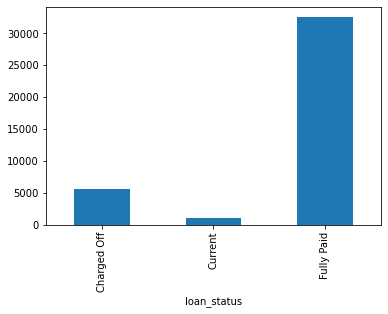

In [1614]:
df_loan_clean.groupby('loan_status')['loan_amnt'].count().plot.bar()

<p style='color:Purple'> 
<b> Observation </b> </br> 
We know that loan_status "Current" refers to the one which is currenlty in progress, hence it won't be much useful to us. Hence, we will remove these records.
</p> 



In [1615]:
df_loan_clean.shape

(39134, 25)

In [1616]:
df_loan_clean = df_loan_clean[~(df_loan_clean['loan_status']=='Current')]
df_loan_clean.shape

(38037, 25)

<b> ================================================================================================================================================================================</b>


### [2] Univariate Analysis <a name="2"></a>
We did most of the Univariate analysis in data cleaning section itself, however let's still do some distributions plots for continuous variables.

For Univariate Analysis, we will use seaborn library.

[Back To Table of Contents](#top)

In [1617]:
df_loan_clean.groupby('loan_status')['loan_amnt'].count()

loan_status
Charged Off     5515
Fully Paid     32522
Name: loan_amnt, dtype: int64

#### [2.1] Loan Split by loan_status <a name="2.1"> </a>



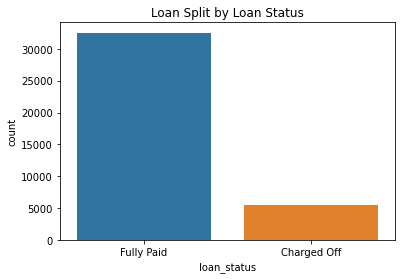

In [1618]:
sns.countplot(x = 'loan_status', data = df_loan_clean)
plt.title("Loan Split by Loan Status")
plt.show()


<p style='color:Purple'> 
<b> Univariate Analysis - Observation 1  </b> </br> 
Most of the borrowers has fully paid the loans. However, ~17% of the loans are still charged-off. 
</p> 



#### [2.2] Loan Distribution by loan_amnt <a name="2.2"> </a>

[Back To Table of Contents](#top)

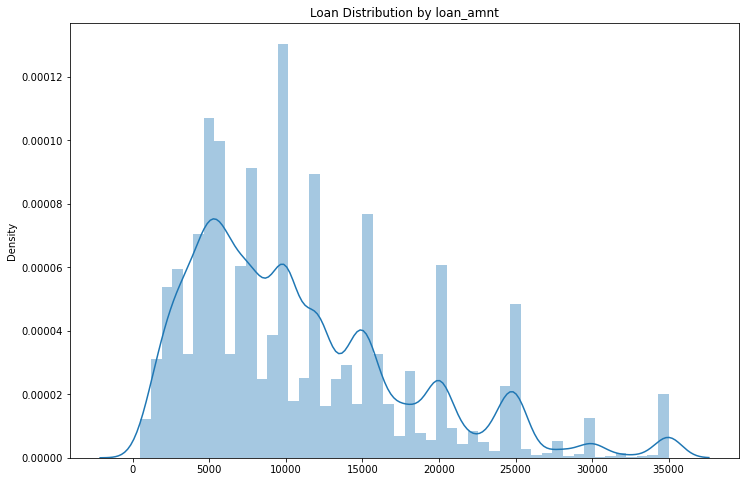

In [1619]:
plt.figure(figsize=(12,8))
sns.distplot(x = df_loan_clean.loan_amnt)
plt.title(f"Loan Distribution by loan_amnt")
plt.show()

In [1620]:
df_loan_clean['loan_amnt'].describe()

count    38037.000000
mean     10915.992981
std       7221.574613
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [1621]:
df_loan_clean['loan_amnt'].mode()

0    10000
dtype: int64

<p style='color:Purple'> 
<b> Univariate Analysis - Observation 2  </b> </br> 
Loan amount ranges from 500 to 35000. The amount of 10000 is the most frequent loan amount, which is very close to median which is 9600. 
</p> 



#### [2.3] Loan by interest rate  <a name="2.3"> </a>

[Back To Table of Contents](#top)

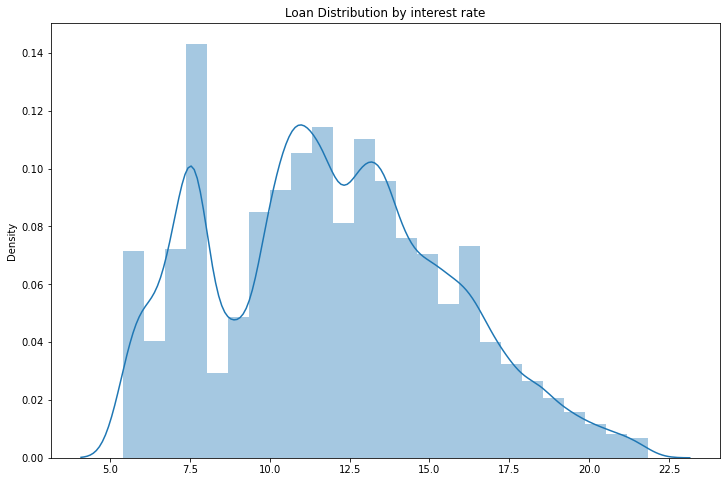

In [1622]:
plt.figure(figsize=(12,8))
sns.distplot(x = df_loan_clean.int_rate,bins=25)
plt.title(f"Loan Distribution by interest rate")
plt.show()

In [1623]:
df_loan_clean['int_rate'].describe()

count    38037.000000
mean        11.875610
std          3.629024
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         21.820000
Name: int_rate, dtype: float64

In [1624]:
df_loan_clean['int_rate'].mode()

0    10.99
dtype: float64

<p style='color:Purple'> 
<b> Univariate Analysis - Observation 3  </b> </br> 
Loan interest varies from 5.42% to 21.82% The interest_rate of 10.99% is the most frequent interest rate, which is very close to median which is 11.71%. 
We also see a trend where as the loan_interest increases, the total count of loan decreases. That means, only a handful of loans being given has high interest rates. 
</p> 



#### [2.4] Count of loan by grades  <a name="2.4"> </a>

[Back To Table of Contents](#top)

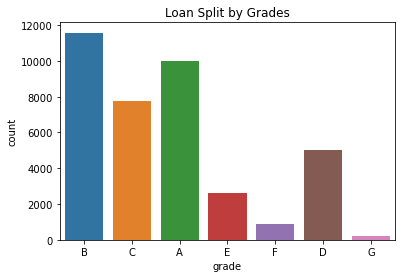

In [1625]:
sns.countplot(x = 'grade', data = df_loan_clean)
plt.title("Loan Split by Grades")
plt.show()


<p style='color:Purple'> 
<b> Univariate Analysis - Observation 4 </b> </br> 
Grades seem to have high correlation with interest rates, and are probably defined based on the categorization of interest rates. Based on #3, Higher the grade, higher the interest rate. 
</p> 



#### [2.5] Count of loan by tenure-of-employment  <a name="2.5"> </a>

[Back To Table of Contents](#top)

In [1626]:
# Calculate % contribution of empoloyment tenure
df_loan_contrib = df_loan_clean.groupby('emp_length')['loan_amnt'].count().reset_index()
df_loan_contrib['emp_contrib'] = df_loan_contrib['loan_amnt']*100 / df_loan_contrib['loan_amnt'].sum()


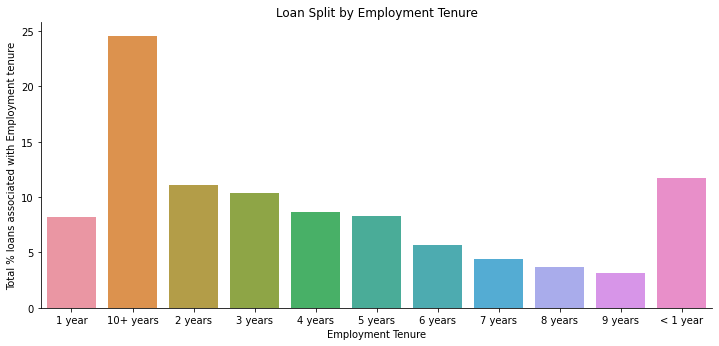

In [1627]:
# plt.figure(figsize=(20,8))
sns.catplot(x = 'emp_length', y = 'emp_contrib', kind = 'bar', data = df_loan_contrib, height=4.5, aspect=2.2)
plt.title("Loan Split by Employment Tenure")
plt.xlabel("Employment Tenure")
plt.ylabel("Total % loans associated with Employment tenure")

plt.show();


<p style='color:Purple'> 
<b> Univariate Analysis - Observation 5 </b> </br> 
More than 25% of the loan is borrowed by applicants with 10+ years of experience. Also, freshers with < 1 yeaf experience also contribute to close to 12% of total loans.  
</p> 

#### [2.6] Count of loan by home-ownership  <a name="2.6"> </a>

[Back To Table of Contents](#top)

In [1628]:
# Calculate % contribution of home_ownership
df_owner_contrib = df_loan_clean.groupby('home_ownership')['loan_amnt'].count().reset_index()
df_owner_contrib['emp_contrib'] = df_owner_contrib['loan_amnt']*100 / df_owner_contrib['loan_amnt'].sum()


In [1629]:
df_owner_contrib

,home_ownership,loan_amnt,emp_contrib
0,MORTGAGE,16677,43.844152
1,NONE,3,0.007887
2,OTHER,96,0.252386
3,OWN,2938,7.724058
4,RENT,18323,48.171517


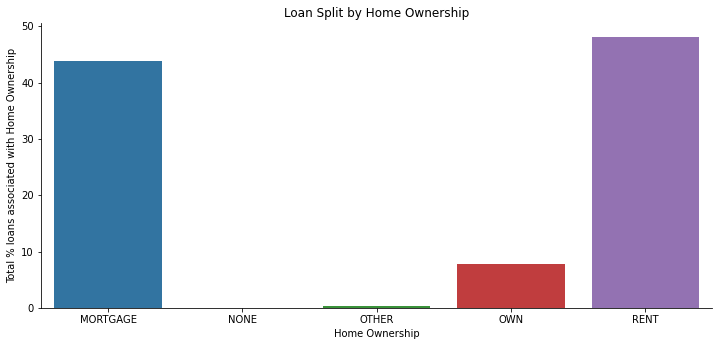

In [1630]:
# plt.figure(figsize=(20,8))
sns.catplot(x = 'home_ownership', y = 'emp_contrib', kind = 'bar', data = df_owner_contrib, height=4.5, aspect=2.2)
plt.title("Loan Split by Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Total % loans associated with Home Ownership")

plt.show();


<p style='color:Purple'> 
<b> Univariate Analysis - Observation 6 </b> </br> 
90% of loan is associated with borrowers who have a Mortgage or pay rent. Mortgage and Rent have almosyt similar number of loans associated.
</p> 

#### [2.7] Count of loan by verification_status <a name="2.7"> </a>

[Back To Table of Contents](#top)

In [1631]:
# Calculate % contribution of home_ownership
df_veri_contrib = df_loan_clean.groupby('verification_status')['loan_amnt'].count().reset_index()
df_veri_contrib['emp_contrib'] = df_veri_contrib['loan_amnt']*100 / df_veri_contrib['loan_amnt'].sum()


In [1632]:
df_veri_contrib

,verification_status,loan_amnt,emp_contrib
0,Not Verified,16594,43.625943
1,Source Verified,9512,25.007230
2,Verified,11931,31.366827


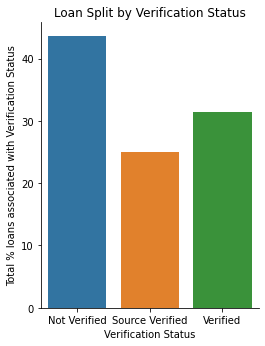

In [1633]:
# plt.figure(figsize=(20,8))
sns.catplot(x = 'verification_status', y = 'emp_contrib', kind = 'bar', data = df_veri_contrib, height=4.5, aspect=0.8)
plt.title("Loan Split by Verification Status")
plt.xlabel("Verification Status")
plt.ylabel("Total % loans associated with Verification Status")

plt.show();


<p style='color:Purple'> 
<b> Univariate Analysis - Observation 7 </b> </br> 
43% of loan is associated with borrowers who are not verified.
</p> 

#### [2.8] Count of loan by purpose <a name="2.8"> </a>

[Back To Table of Contents](#top)

In [1634]:
# Calculate % contribution of home_ownership
df_purpose_contrib = df_loan_clean.groupby('purpose')['loan_amnt'].count().reset_index()
df_purpose_contrib['emp_contrib'] = df_purpose_contrib['loan_amnt']*100 / df_purpose_contrib['loan_amnt'].sum()


In [1635]:
df_purpose_contrib

,purpose,loan_amnt,emp_contrib
0,car,1490,3.917238
1,credit_card,4966,13.055709
2,debt_consolidation,17824,46.859637
3,educational,323,0.849173
4,home_improvement,2794,7.345479
5,house,356,0.935931
6,major_purchase,2127,5.591924
7,medical,673,1.769330
8,moving,568,1.493283
9,other,3818,10.037595


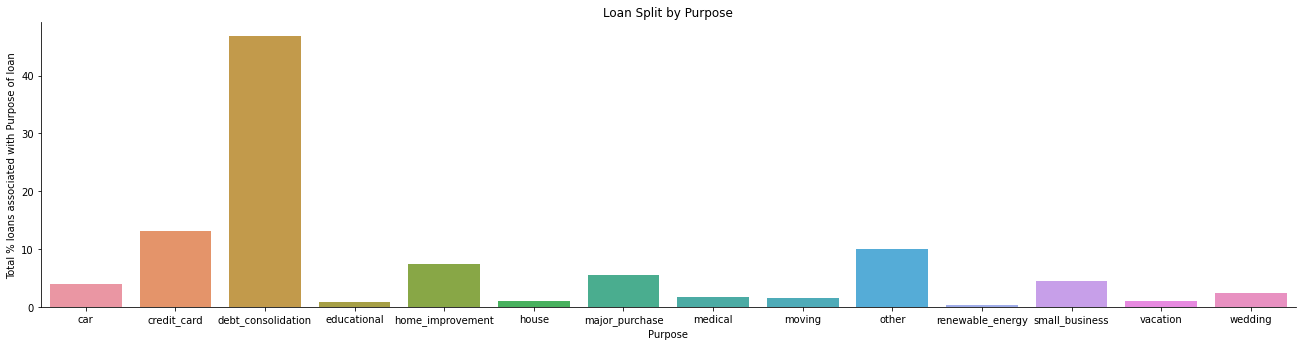

In [1636]:
# plt.figure(figsize=(20,8))
sns.catplot(x = 'purpose', y = 'emp_contrib', kind = 'bar', data = df_purpose_contrib, height=4.5, aspect=4)
plt.title("Loan Split by Purpose")
plt.xlabel("Purpose")
plt.ylabel("Total % loans associated with Purpose of loan")

plt.show();


<p style='color:Purple'> 
<b> Univariate Analysis - Observation 8 </b> </br> 
Close to 47% of loan is associated with debt-consolidation. While 13% is associated with credit-card payments.
</p> 

#### [2.9] Count of loan by year <a name="2.9"> </a>

[Back To Table of Contents](#top)

In [1637]:
df_year_contrib = df_loan_clean.groupby('issue_year').agg({'funded_amnt':'count','loan_amnt':'sum'}).reset_index()
df_year_contrib['count_loans_contrib'] = df_year_contrib['funded_amnt']*100 / df_year_contrib['funded_amnt'].sum()
df_year_contrib['sum_loans_contrib'] = df_year_contrib['loan_amnt']*100 / df_year_contrib['loan_amnt'].sum()
df_year_contrib

,issue_year,funded_amnt,loan_amnt,count_loans_contrib,sum_loans_contrib
0,2007,247,2154275,0.649368,0.518838
1,2008,1552,14268825,4.080238,3.436519
2,2009,4662,45602425,12.256487,10.982936
3,2010,11411,120067200,29.999737,28.917109
4,2011,20165,233118900,53.014170,56.144599


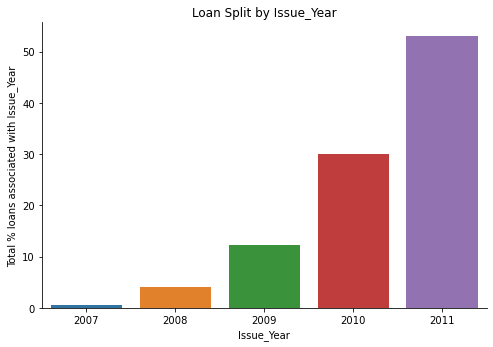

In [1638]:
# plt.figure(figsize=(20,8))
sns.catplot(x = 'issue_year', y = 'count_loans_contrib', kind = 'bar', data = df_year_contrib, height=4.5, aspect=1.5)
plt.title("Loan Split by Issue_Year")
plt.xlabel("Issue_Year")
plt.ylabel("Total % loans associated with Issue_Year")
plt.show();


<p style='color:Purple'> 
<b> Univariate Analysis - Observation 9 </b> </br> 
We observe increase in number of loans issued throghtout 2007-2011. We can say that loan applications as well as loan approval rate is increasing. 
</p> 

#### [2.10] Count of loan by month <a name="2.10"> </a>

[Back To Table of Contents](#top)

In [1639]:
df_month_contrib = df_loan_clean.groupby('issue_month').agg({'funded_amnt':'count'}).reset_index()
df_month_contrib['count_loans_contrib'] = df_month_contrib['funded_amnt']*100 / df_month_contrib['funded_amnt'].sum()
df_month_contrib

,issue_month,funded_amnt,count_loans_contrib
0,1,2352,6.183453
1,2,2336,6.141389
2,3,2659,6.990562
3,4,2808,7.382286
4,5,2879,7.568946
5,6,3126,8.218314
6,7,3309,8.699424
7,8,3348,8.801956
8,9,3450,9.070116
9,10,3683,9.682677


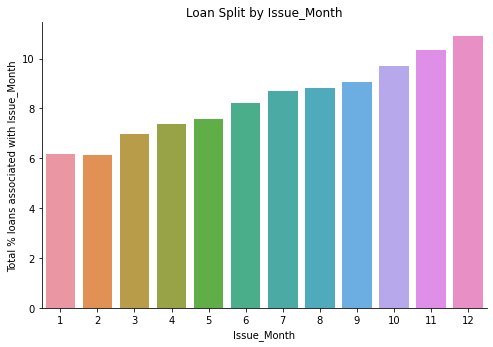

In [1640]:
# plt.figure(figsize=(20,8))
sns.catplot(x = 'issue_month', y = 'count_loans_contrib', kind = 'bar', data = df_month_contrib, height=4.5, aspect=1.5)
plt.title("Loan Split by Issue_Month")
plt.xlabel("Issue_Month")
plt.ylabel("Total % loans associated with Issue_Month")
plt.show();


<p style='color:Purple'> 
<b> Univariate Analysis - Observation 10 </b> </br> 
Number of loans increases towards end of month.
</p> 

In [1641]:
# Calculate % contribution of home_ownership
df_year_contrib = df_loan_clean.groupby('issue_year')['loan_amnt'].count().reset_index()


In [1642]:
df_year_contrib

,issue_year,loan_amnt
0,2007,247
1,2008,1552
2,2009,4662
3,2010,11411
4,2011,20165


<b> ================================================================================================================================================================================</b>


### [3] Segmented Univariate Analysis <a name="3"> </a>

#### [3.1] Distribution of loan_amnt based on loan_status <a name="3.1"> </a>

[Back To Table of Contents](#top)



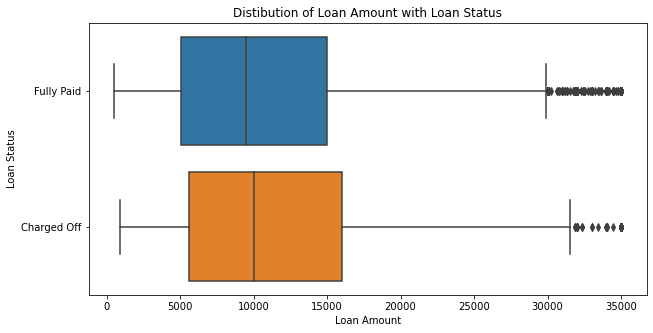

In [1649]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=df_loan_clean,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount with Loan Status',fontsize=12)
plt.show()

<p style='color:Purple'> 
<b> **Segmented Univariate Analysis - Observation 1 </b> </br> 
Higher loan amounts have a higher chance of defaulting the loan. This is based on the 75th percentile numbers of the loan_amount.
</p> 

#### [3.2] Distribution of loan_amnt based on loan term <a name="3.2"> </a>

[Back To Table of Contents](#top)



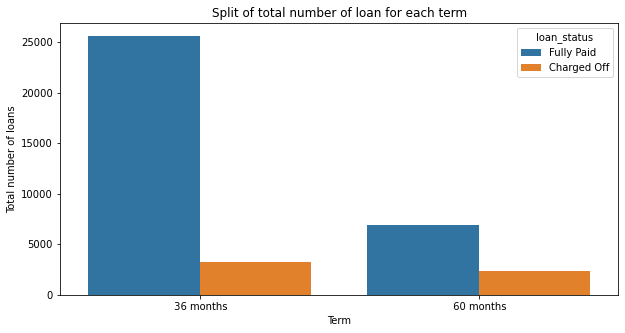

In [1653]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_loan_clean,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Total number of loans')
plt.title('Split of total number of loan for each term',fontsize=12)
plt.show()

<p style='color:Purple'> 
<b> **Segmented Univariate Analysis - Observation 2 </b> </br> 
Loan taken for a term of 60 months has higher chances of default. Close to 25% of the total loans taken for 60 months default. 
</p> 

#### [3.3] Distribution of loan_amnt based on home ownership <a name="3.3"> </a>

[Back To Table of Contents](#top)



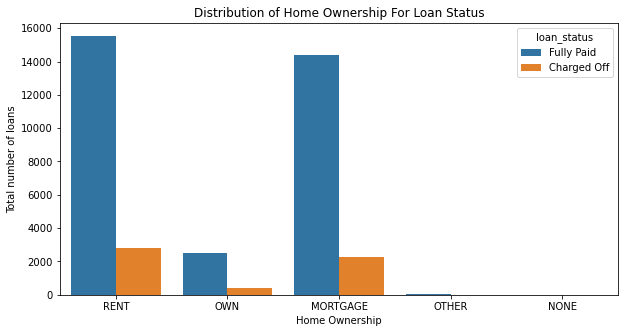

In [1655]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_loan_clean,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Total number of loans')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.show()

<p style='color:Purple'> 
<b> **Segmented Univariate Analysis - Observation 3 </b> </br> 
Borrowers who Own a property have lesser chances of defaulting a loan. It is relatively safe to give to borrowers who Own a property.  
</p> 

#### [3.4] Distribution of loan_amnt based on purpose of loan <a name="3.4"> </a>

[Back To Table of Contents](#top)

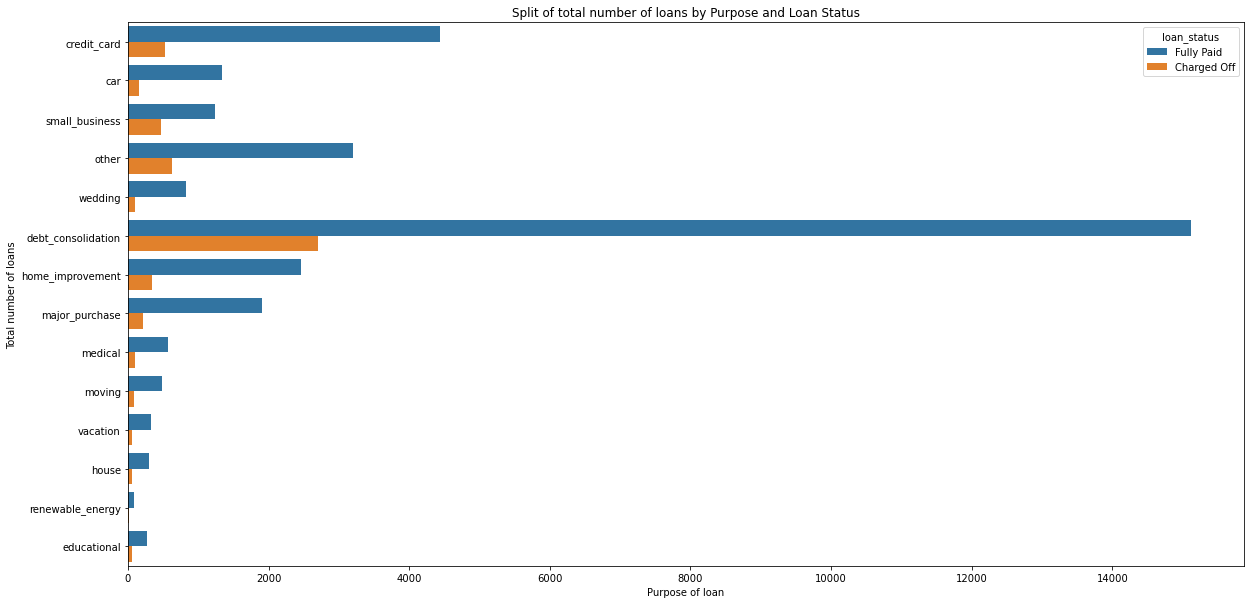

In [1661]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_loan_clean,y='purpose',hue='loan_status')
plt.xlabel('Purpose of loan')
plt.ylabel('Total number of loans')
plt.title('Split of total number of loans by Purpose and Loan Status',fontsize=12)
plt.show()

<p style='color:Purple'> 
<b> Segmented Univariate Analysis - Observation 4 </b> </br> 
Loan Status seems to be agnostic of the loan purpose. Because 47% of loan is to repay consoliated-debt, hence this bucket will have maximum number of defaulters and full-paid borrowers. 
</p> 

#### [3.5] Distribution of loan based on employment tenure <a name="3.5"> </a>

[Back To Table of Contents](#top)

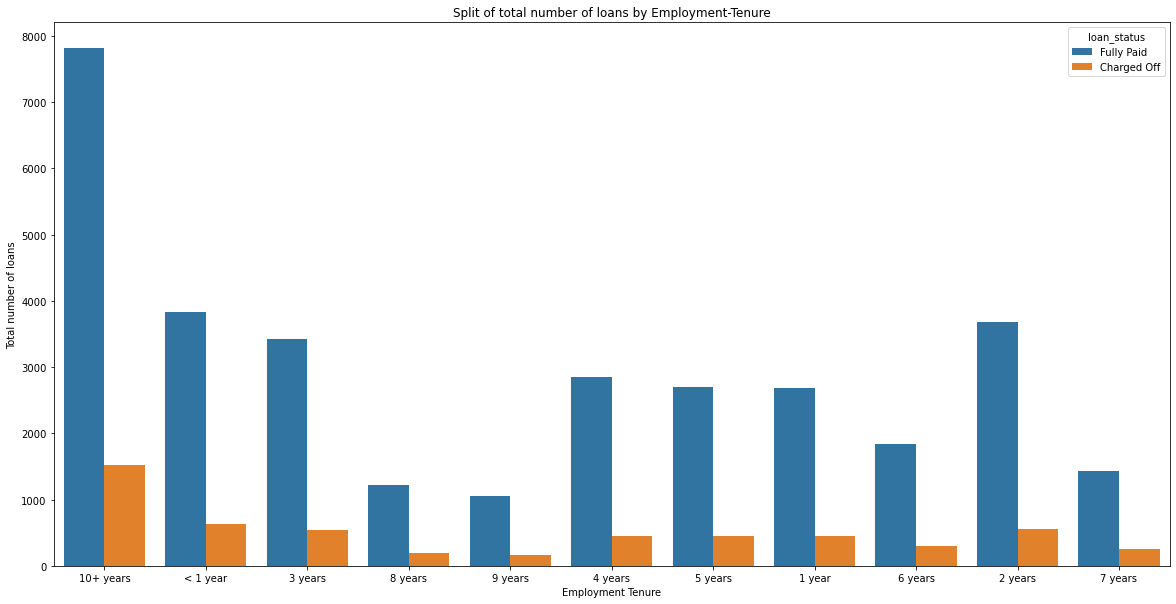

In [1665]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_loan_clean,x='emp_length',hue='loan_status')
plt.xlabel('Employment Tenure')
plt.ylabel('Total number of loans')
plt.title('Split of total number of loans by Employment-Tenure',fontsize=12)
plt.show()

<p style='color:Purple'> 
<b> Segmented Univariate Analysis - Observation 5 </b> </br> 
Loan Status seems to be agnostic of the employement tenure. Because 47% of loan is to repay consoliated-debt, hence this bucket will have maximum number of defaulters and full-paid borrowers. 
</p> 

#### [3.6] Distribution of loan based on annual_income <a name="3.6"> </a>

[Back To Table of Contents](#top)

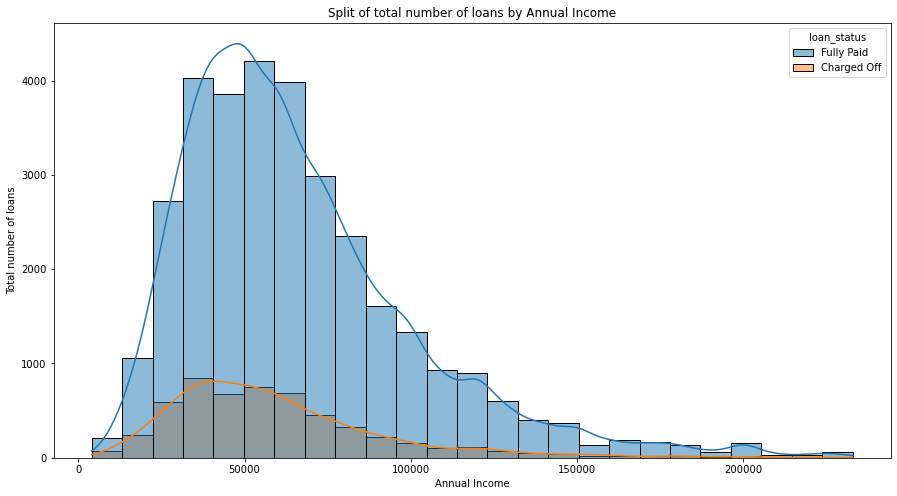

In [1676]:
plt.figure(figsize=(15,8))
sns.histplot(data=df_loan_clean,x='annual_inc',hue='loan_status',kde=True,bins=25)
plt.xlabel('Annual Income')
plt.ylabel('Total number of loans')
plt.title('Split of total number of loans by Annual Income',fontsize=12)
plt.show()

<p style='color:Purple'> 
<b> Segmented Univariate Analysis - Observation 6 </b> </br> 
Annual Income does not seem to play an important role in deciding if a loan will be defaulted. Loan Status seems to be uniformly distributed for "Full Paid" as well as "Charged off" loans
</p> 

#### [3.7] Distribution of loan based on interest_rate <a name="3.7"> </a>

[Back To Table of Contents](#top)

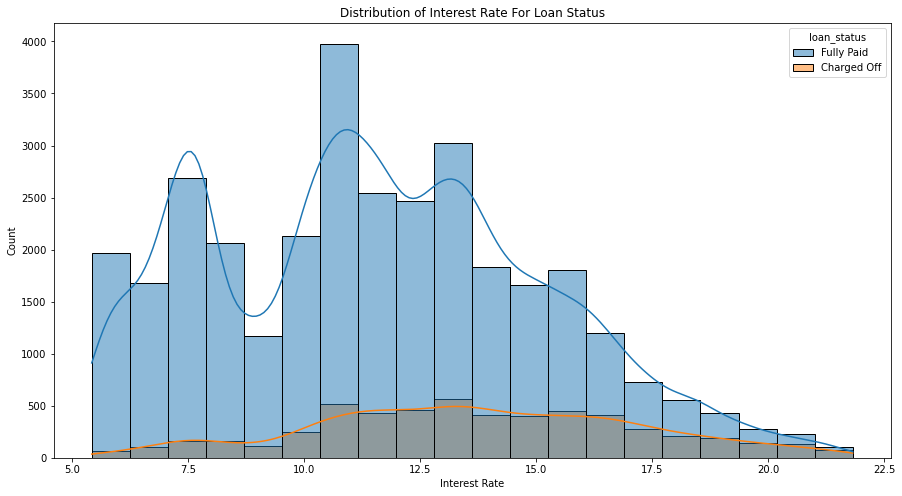

In [1680]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(15,8))
sns.histplot(data=df_loan_clean,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

<p style='color:Purple'> 
<b> **Segmented Univariate Analysis - Observation 7 </b> </br> 
With increase in interest_rates the percentage of loan defaults are increasing.

</p> 

#### [3.8] Analysis of loan based on DTI <a name="3.8"> </a>

[Back To Table of Contents](#top)

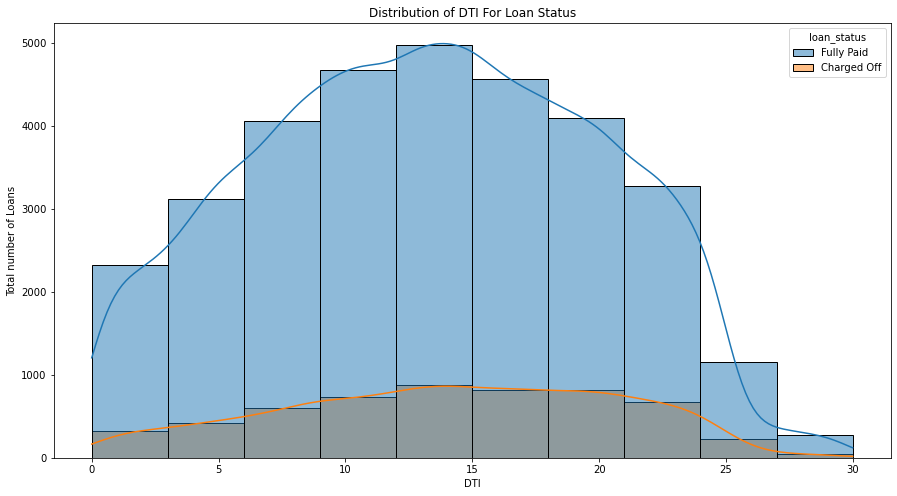

In [1686]:
# Distribution of DTI based on Grade
plt.figure(figsize=(15,8))
sns.histplot(data=df_loan_clean,x='dti',hue='loan_status',bins=10,kde=True)
plt.xlabel('DTI')
plt.ylabel('Total number of Loans')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

<p style='color:Purple'> 
<b> **Segmented Univariate Analysis - Observation 8 </b> </br> 
Higher the DTI, higher the chances of a loan being defaulted. This is an important factor which should be considered while approving loan.
</p> 

<b> ================================================================================================================================================================================</b>


### [4] Bivariate Analysis <a name="4"> </a>

[Back To Table of Contents](#top)

#### [4.1] Find correlation between all continuous variables <a name="4.1"> </a>



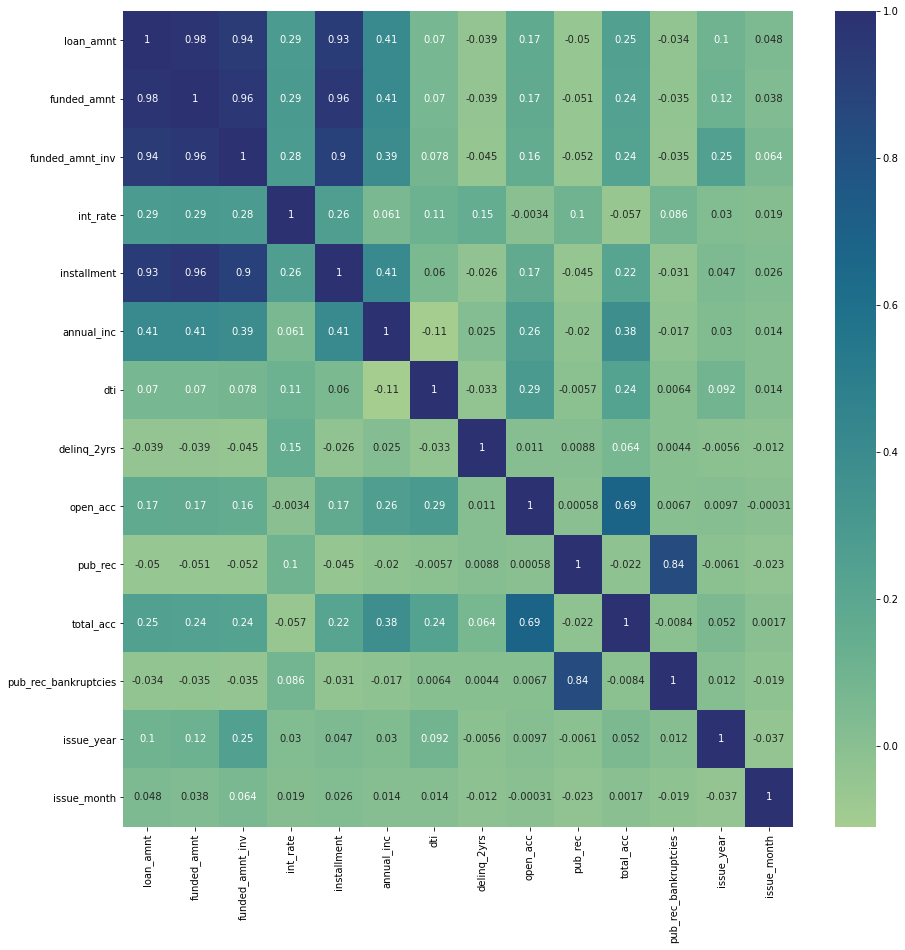

In [1727]:
# Heatmap of correlation between variables
plt.figure(figsize=(15,15))
sns.heatmap(df_loan_clean.corr(),annot=True, cmap="crest")
# sns.heatmap(df_loan_clean.corr(),annot=True)
plt.show()

<p style='color:Purple'> 
<b> Bivariate Analysis - Observation 1 </b> </br> 
We have a good correlation between installment and loan_amount. And this gives us the correlation between all the continuous variable. 
</p> 

#### [4.2] Validate correlation between interest rate and grade <a name="4.2"> </a>

[Back To Table of Contents](#top)

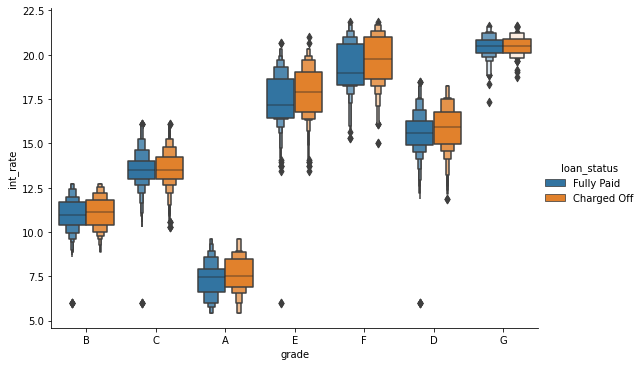

In [1728]:
sns.catplot(x = 'grade', y = 'int_rate', kind = 'boxen', data = df_loan_clean, hue = 'loan_status',aspect=1.5)

<p style='color:Purple'> 
<b> Bivariate Analysis - Observation 2 </b> </br> 
Interest Rate and Grade are highly correlated with each other. 
</p> 

#### [4.3] Analyze the relation between home_ownership and loan_status  <a name="4.3"> </a>

[Back To Table of Contents](#top)

<Figure size 720x360 with 0 Axes>

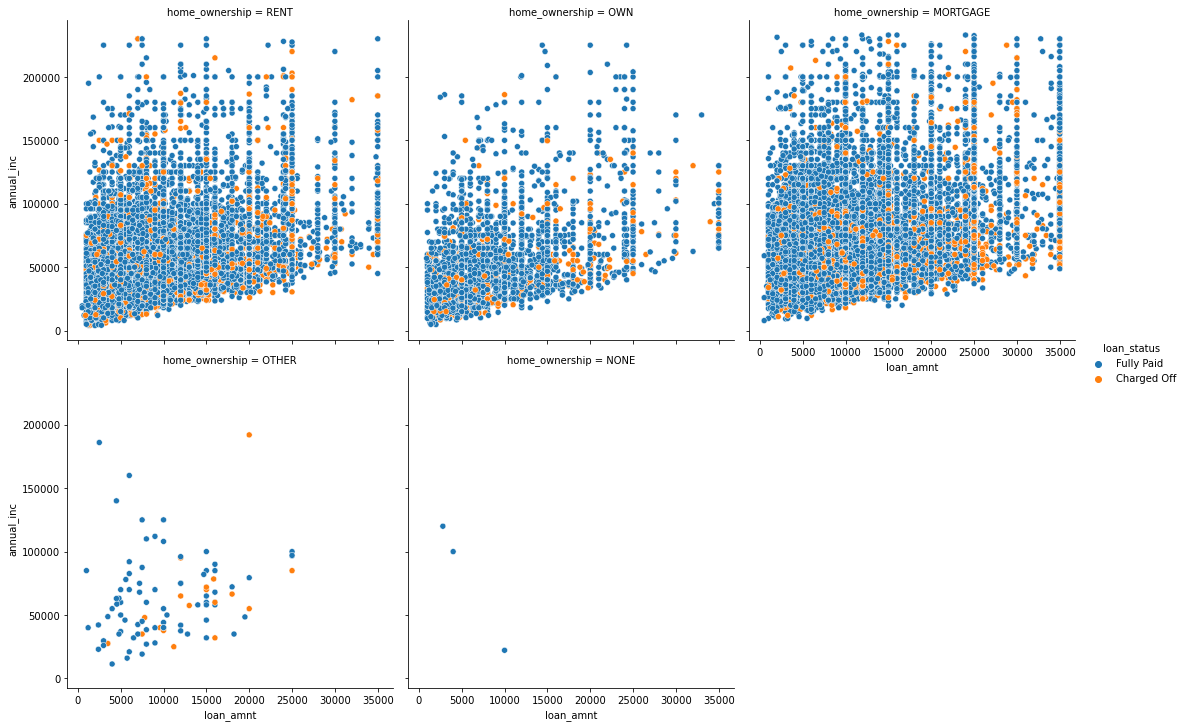

In [1736]:
plt.figure(figsize=(10,5))
sns.relplot(x = 'loan_amnt', y = 'annual_inc', hue = 'loan_status', col = 'home_ownership', data = df_loan_clean, col_wrap=3)
plt.show()

<p style='color:Purple'> 
<b> Bivariate Analysis - Observation 3 </b> </br> 
Borrowers with a rented property, have high occurrences of defaulting the loan.
</p> 

#### [4.4] Analyze the total number of loans with public record bankruptcies  <a name="4.4"> </a>

[Back To Table of Contents](#top)

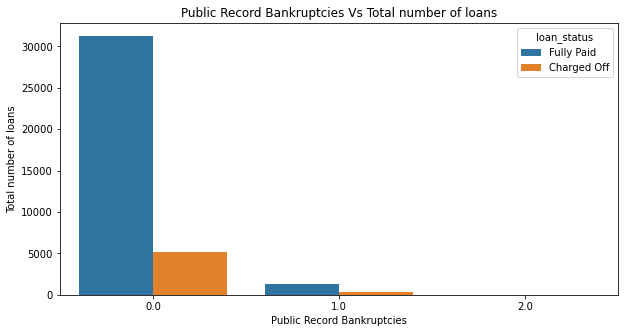

In [1743]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_loan_clean,x='pub_rec_bankruptcies',hue='loan_status')
plt.ylabel('Total number of loans')
plt.xlabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Total number of loans',fontsize=12)
plt.show()

<p style='color:Purple'> 
<b> Bivariate Analysis - Observation 4 </b> </br> 
A positive public record bankruptcy denotes higher chances of a loan default.  
</p> 

#### [4.5] Analyze the loan amount with Annual Income by loan status, home_ownership and verification_status <a name="4.5"> </a>

[Back To Table of Contents](#top)

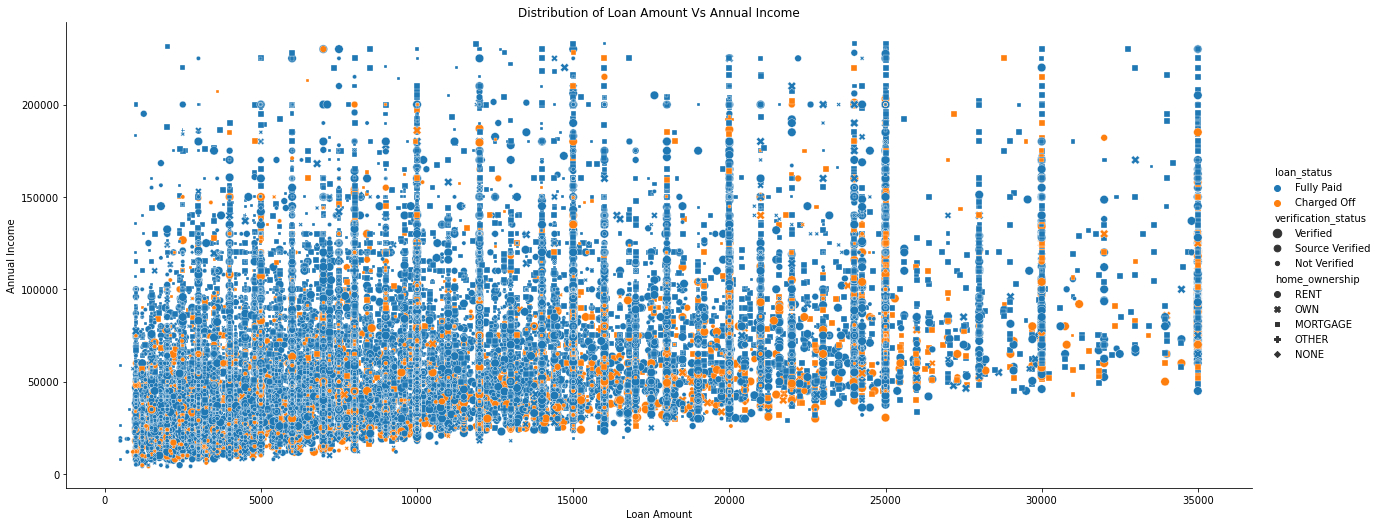

In [1745]:
sns.relplot(x = 'loan_amnt', y = 'annual_inc', data = df_loan_clean, hue = 'loan_status' ,style = 'home_ownership' 
            , size = 'verification_status'
#             , sizes = (5, 20) 
            ,height=7 ,aspect=2.5)
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income') 
plt.title('Distribution of Loan Amount Vs Annual Income',fontsize=12)
plt.show()

#### [4.6] Analyze the annual-income by loan status and grade <a name="4.6"> </a>

[Back To Table of Contents](#top)

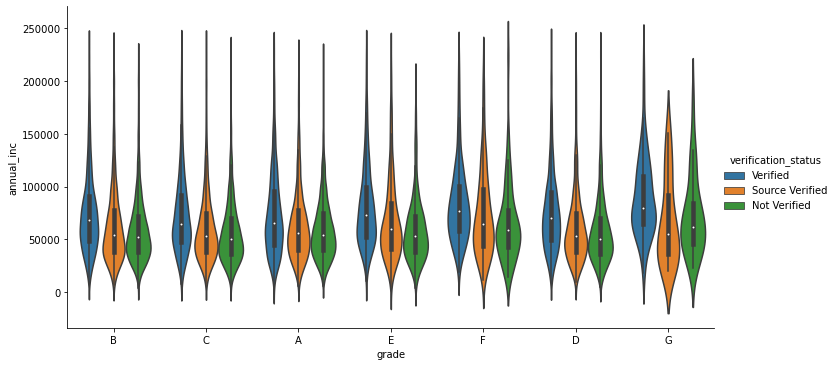

In [1749]:
sns.catplot(x = 'grade', y = 'annual_inc', kind = 'violin', data = df_loan_clean, hue = 'verification_status',aspect=2)

<b> ================================================================================================================================================================================</b>


### [5] Consolidated observations from the Analysis <a name="5"></a>

[Back To Table of Contents](#top)

#### Univariate Analysis

1. Most of the borrowers has fully paid the loans. However, ~17% of the loans are still charged-off.
2. Loan amount ranges from 500 to 35000. The amount of 10000 is the most frequent loan amount, which is very close to median which is 9600.
3. Loan interest varies from 5.42% to 21.82% The interest_rate of 10.99% is the most frequent interest rate, which is very close to median which is 11.71%. We also see a trend where as the loan_interest increases, the total count of loan decreases. That means, only a handful of loans being given has high interest rates.
4. Grades seem to have high correlation with interest rates, and are probably defined based on the categorization of interest rates. Based on #3, Higher the grade, higher the interest rate.
5. More than 25% of the loan is borrowed by applicants with 10+ years of experience. Also, freshers with < 1 yeaf experience also contribute to close to 12% of total loans.
6. 90% of loan is associated with people who have a Mortgage or pay rent. Mortgage and Rent have almosyt similar number of loans associated.
7. 43% of loan is associated with borrowers who are not verified.
8. Close to 47% of loan is associated with debt-consolidation. While 13% is associated with credit-card payments.
9. We observe increase in number of loans issued throghtout 2007-2011. We can say that loan applications as well as loan approval rate is increasing.
10. Number of loans increases towards end of month.


#### Segmented Univariate Analysis

1. **Higher loan amounts have a higher chance of defaulting the loan. This is based on the 75th percentile numbers of the loan_amount. 
2. **Loan taken for a term of 60 months has higher chances of default. Close to 25% of the total loans taken for 60 months default.
3. **Borrowers who Own a property have lesser chances of defaulting a loan. It is relatively safe to give to borrowers who Own a property.
4. Loan Status seems to be agnostic of the loan purpose and employment tenure. Because 47% of loan is to repay consolidated-debt, hence this bucket will have maximum number of defaulters and full-paid borrowers.
5. Annual Income does not seem to play an important role in deciding if a loan will be defaulted. Loan Status seems to be uniformly distributed for "Full Paid" as well as "Charged off" loans
6. With increase in interest_rates the percentage of loan defaults are increasing.
7. **Higher the DTI, higher the chances of a loan being defaulted. This is an important factor which should be considered while approving loan.


#### Bivariate Analysis

1. We have a good correlation between installment and loan_amount.
2. Interest Rate and Grade are highly correlated with each other.
3. **Borrowers with a rented property, have high occurrences of defaulting the loan.
4. **A positive public record bankruptcy denotes higher chances of a loan default.


<b> ================================================================================================================================================================================</b>


### [6] Driving Factors behind Loan Default <a name="6"></a>

[Back To Table of Contents](#top)

There are a number of attributes which have a direct impact on the loan being Charged-Off. Some of the key atributes are:
    
1. Loan Amount - We observed that higher the loan amount, higher the chances of a loan being charged-off.
2. Term - The loan term plays an important role. If loan is given for a term of 60 months, then it has higher chances of being charged-off.
3. Home Onwership - Borrowers who are associated with a rented propoerty have higher chances of defulting a loan 
4. Public record bankruptcy - Borrowers with positive bankruptcy record have higher chances of defaulting a loan
5. Grade - Borrowers with grades higher than F have higher chances of defaulting a loan
6. Interest Rate - Higher interest rate is a strong factor of loan default. It is to be noted that grades and interest rates are closely correlated. 

To summarize, for any loan application we should genuinely study below 5 attributes:
<b>Loan Amount, Term of Loan, Home Ownership, Public bankruptcy records and Interest rates.</b>

<b> ================================================================================================================================================================================</b>
